# Lab 2: Data Cleaning & Visualization

 ### **Step 1: Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### **Step 2: Load CSV file**

In [3]:
try:
    data_frame = pd.read_csv('data.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")

Data loaded successfully!


### Step 3: Data Cleaning
Option 1: drop rows with missing values (data_frame_clean = data_frame.drpna).

Option 2: Fill with mean/median (for numeric columns)
data_frame[numeric_cols] = data_frame[numeric_cols].fillna(data_ frame[numeric_cols].median()) 

print("\nMissing values after cleaning:", df_clean.isnull().sum().sum())


In [4]:
#Option 2 for MasVnrArea column with median:
data_frame['MasVnrArea'] = data_frame['MasVnrArea'].fillna(data_frame['MasVnrArea'].median())

#imputation fill by neighborhood median
data_frame[data_frame['LotFrontage'].isnull()].groupby('Neighborhood')['LotFrontage'].count()
neighborhood_medians = data_frame.groupby('Neighborhood')['LotFrontage'].median()
data_frame['LotFrontage'] = data_frame['LotFrontage'].fillna(
data_frame['Neighborhood'].map(neighborhood_medians))

In [5]:
print("\nMissing values after cleaning:", data_frame.isnull().sum().sum())
missing_data = data_frame.isnull().sum().sort_values(ascending=False)
print("\n\nMissing Values ascending order:\n\n",missing_data)


Missing values after cleaning: 7562


Missing Values ascending order:

 PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
MasVnrArea        0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [6]:
#Calculate % of missing values
missing_percent = data_frame.isnull().mean()
print ((missing_percent * 100).round(2)) 

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Filter columns with <=5% missing data
columns_to_keep = missing_percent[missing_percent <= 5].index

# Create new dataframe with selected columns
clean_data_frame = data_frame[columns_to_keep]

#Results
print(f"Original columns: {len(data_frame.columns)}")
print(f"Columns kept: {len(columns_to_keep)}")
print(f"Removed {len(data_frame.columns) - len(columns_to_keep)} columns")

Original columns: 81
Columns kept: 81
Removed 0 columns


In [11]:
clean_data_frame.to_csv('housing_data_cleaned.csv', index=False)

In [12]:
print(clean_data_frame.head(20))

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL         80.0    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       

### Step 3: Advanced Visualization

Numeric columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


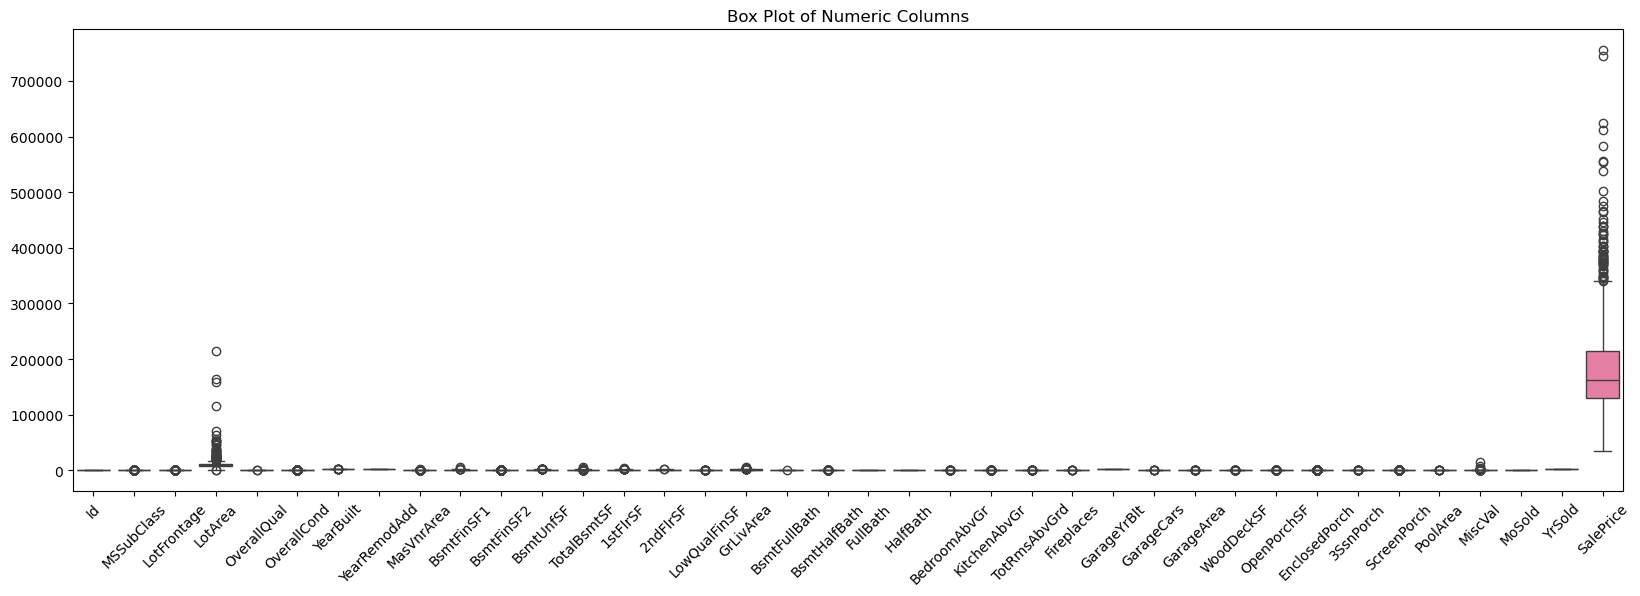

In [13]:
# Box plot for numeric columns
numeric_cols = clean_data_frame.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols.tolist())  # Verify columns

plt.figure(figsize=(20, 6))
sns.boxplot(data=clean_data_frame[numeric_cols])
plt.title('Box Plot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()


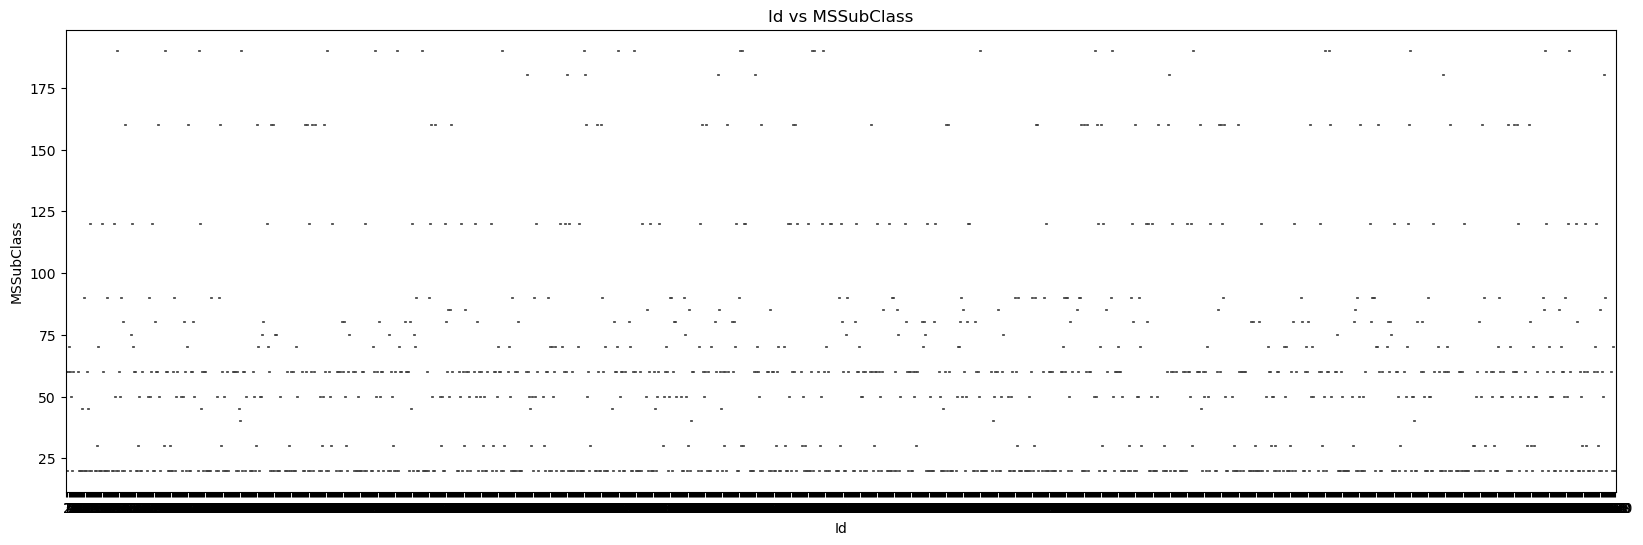

In [18]:
# Scatter plot for two numeric columns (if available)
if len(numeric_cols) >= 2:
    plt.figure(figsize=(20, 6))
    sns.violinplot(x=clean_data_frame[numeric_cols[0]], y=clean_data_frame[numeric_cols[1]])
    plt.title(f'{numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()

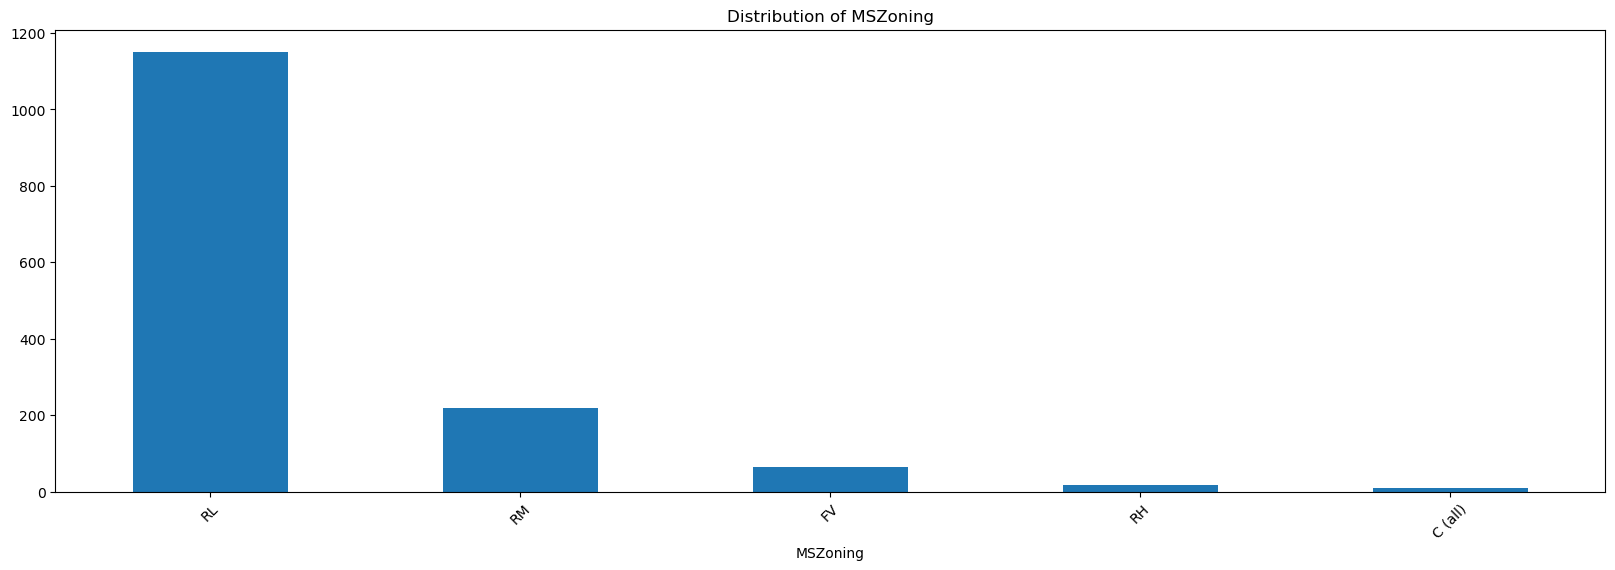

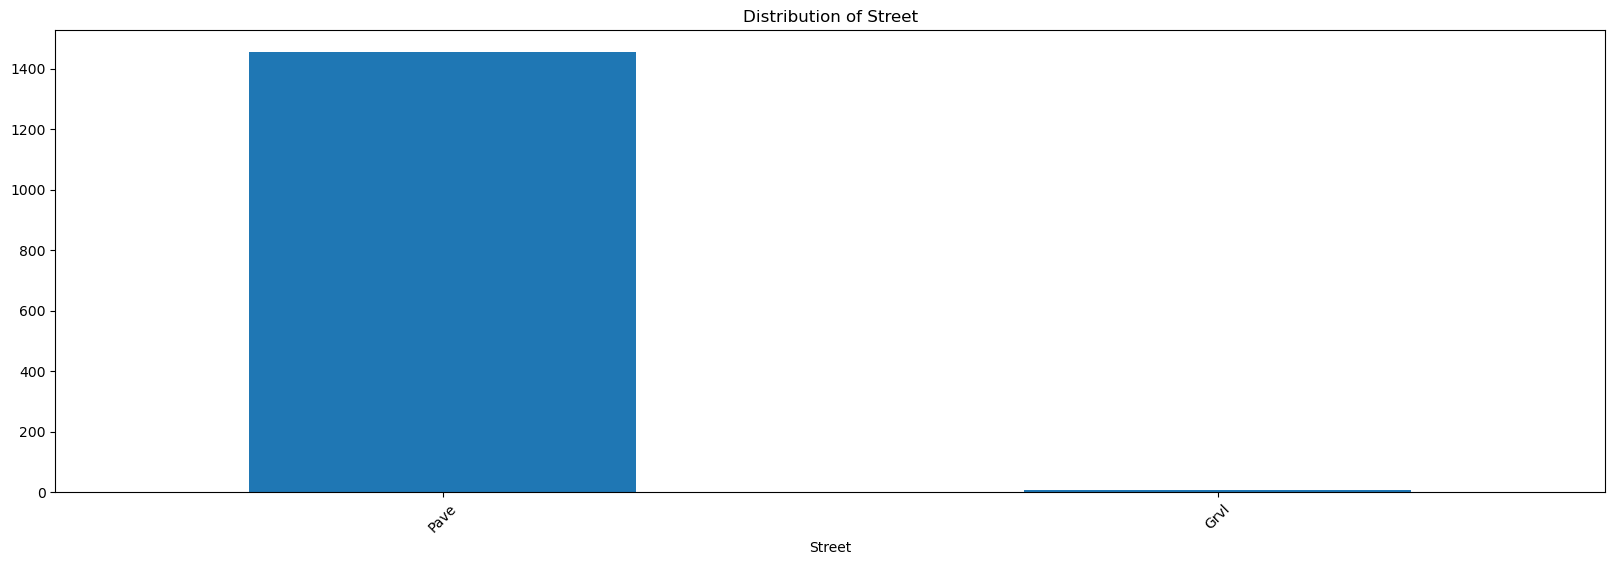

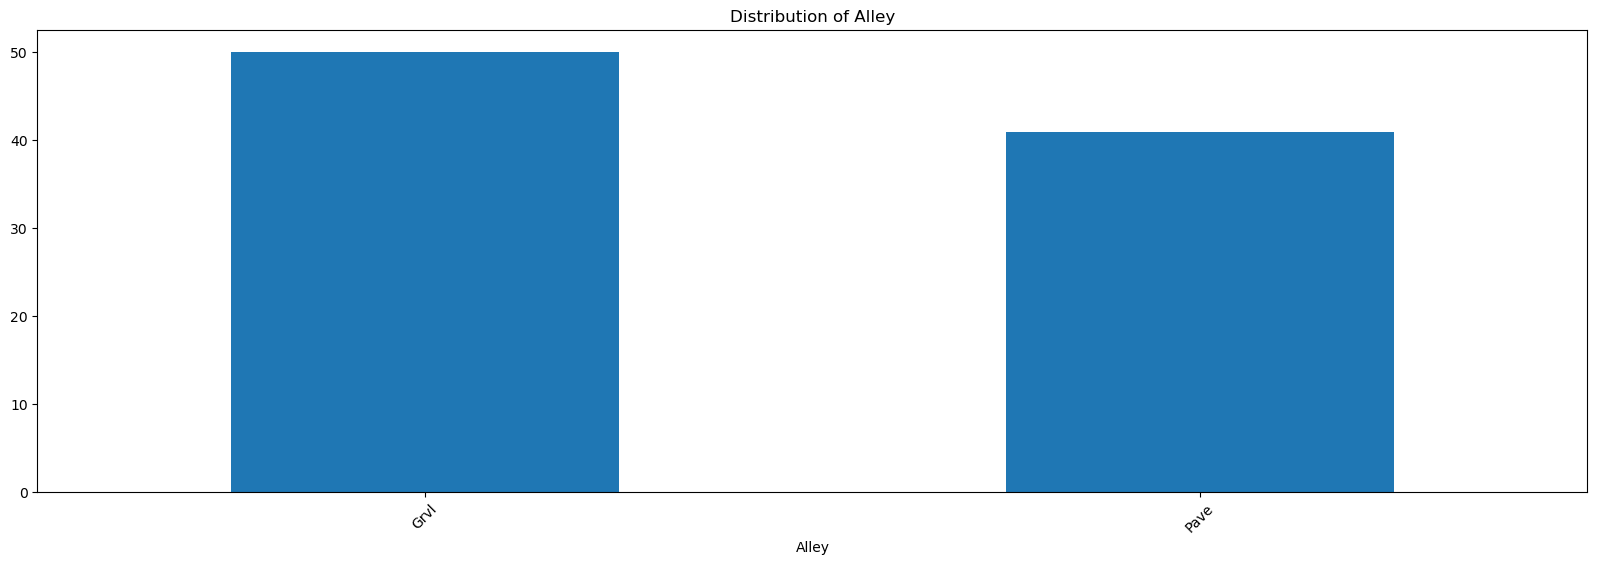

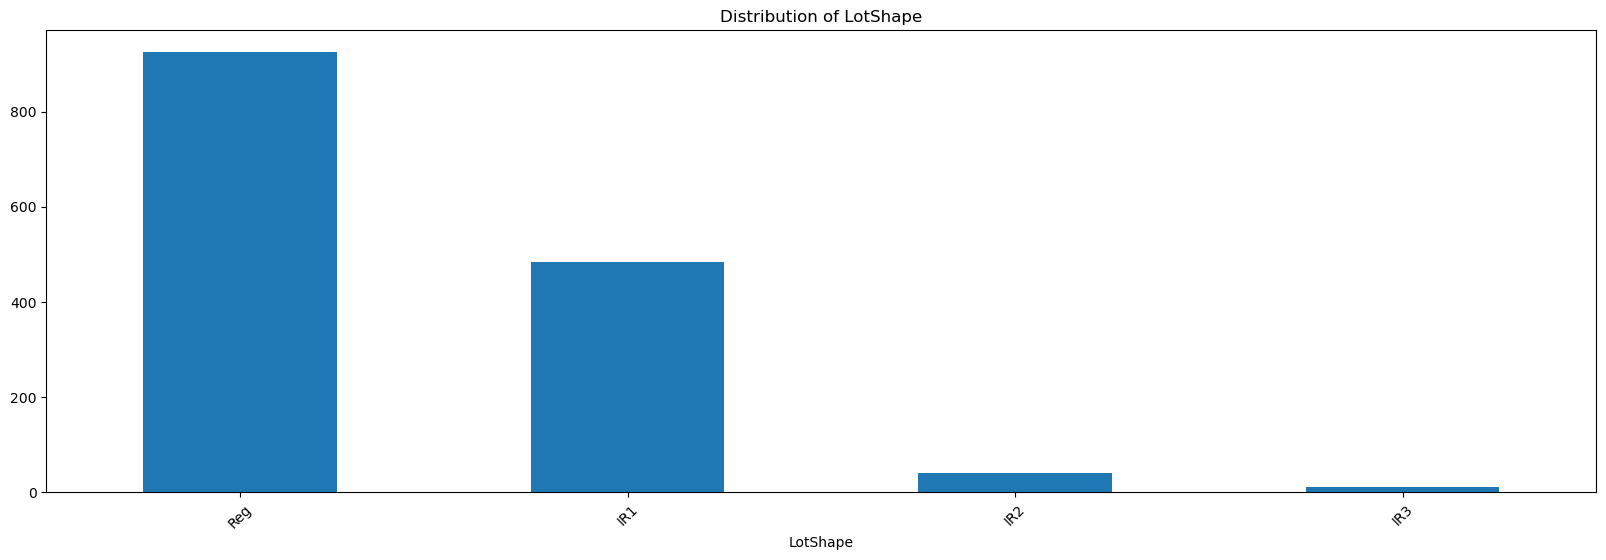

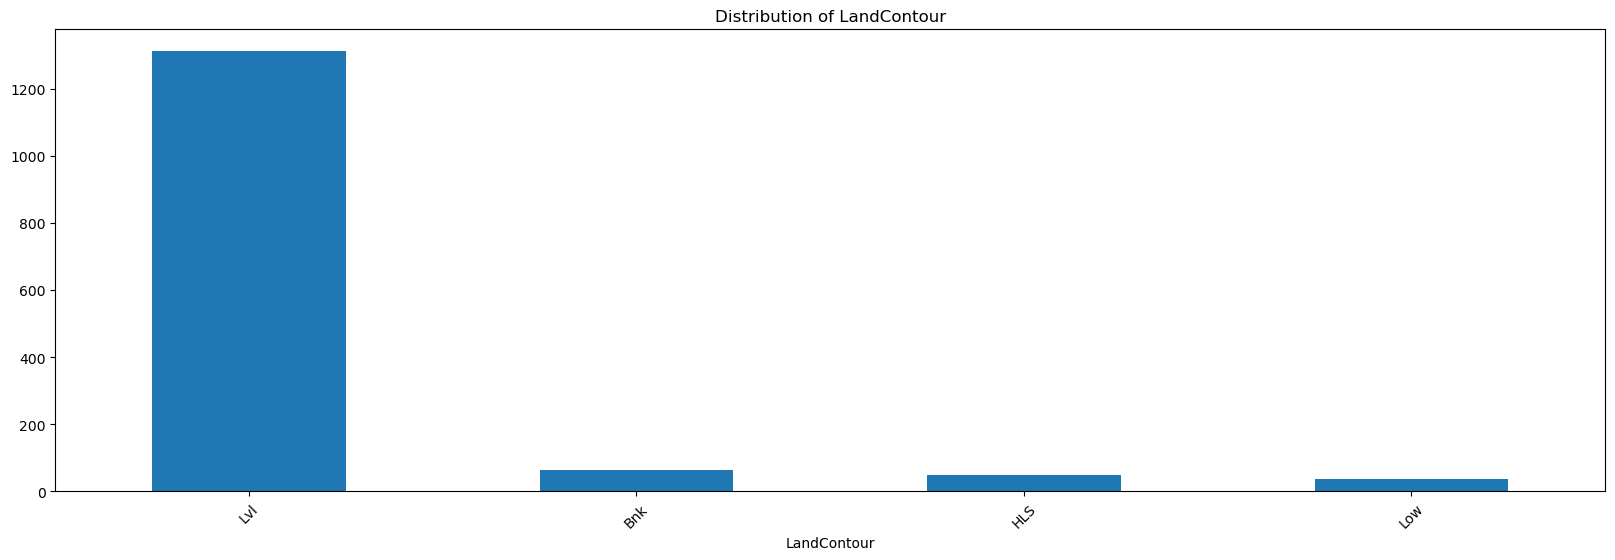

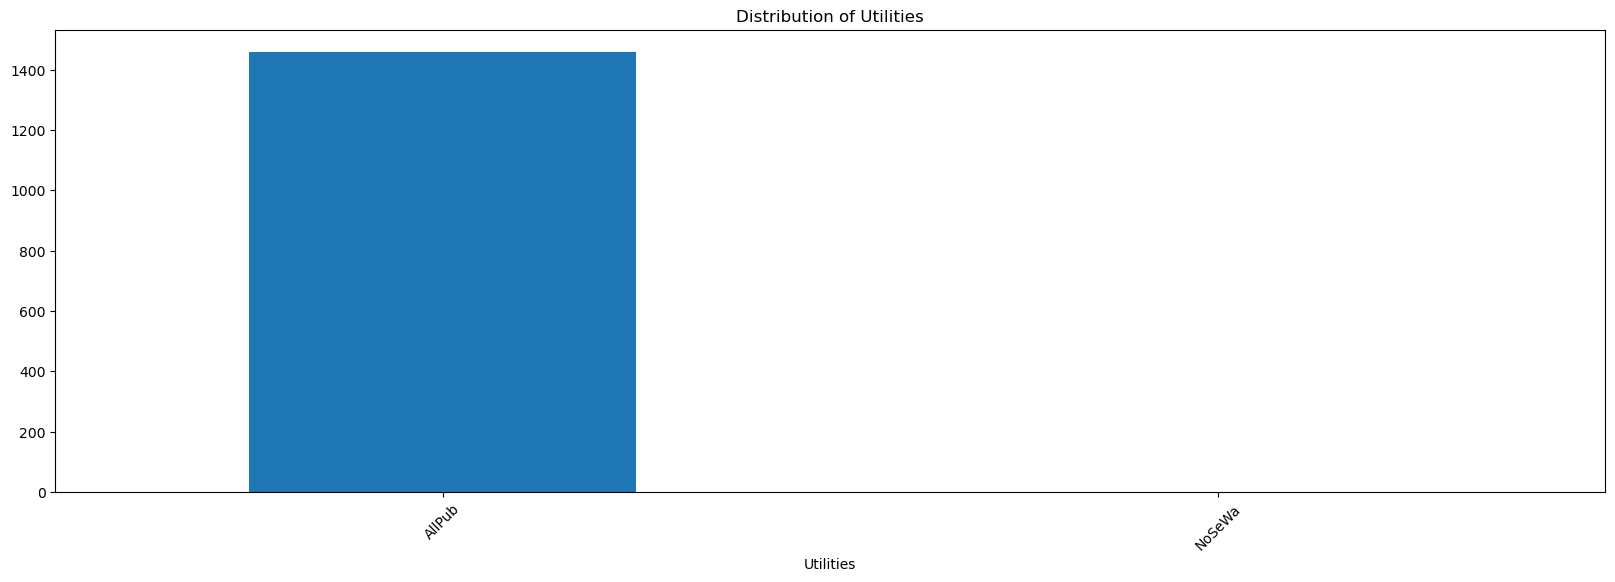

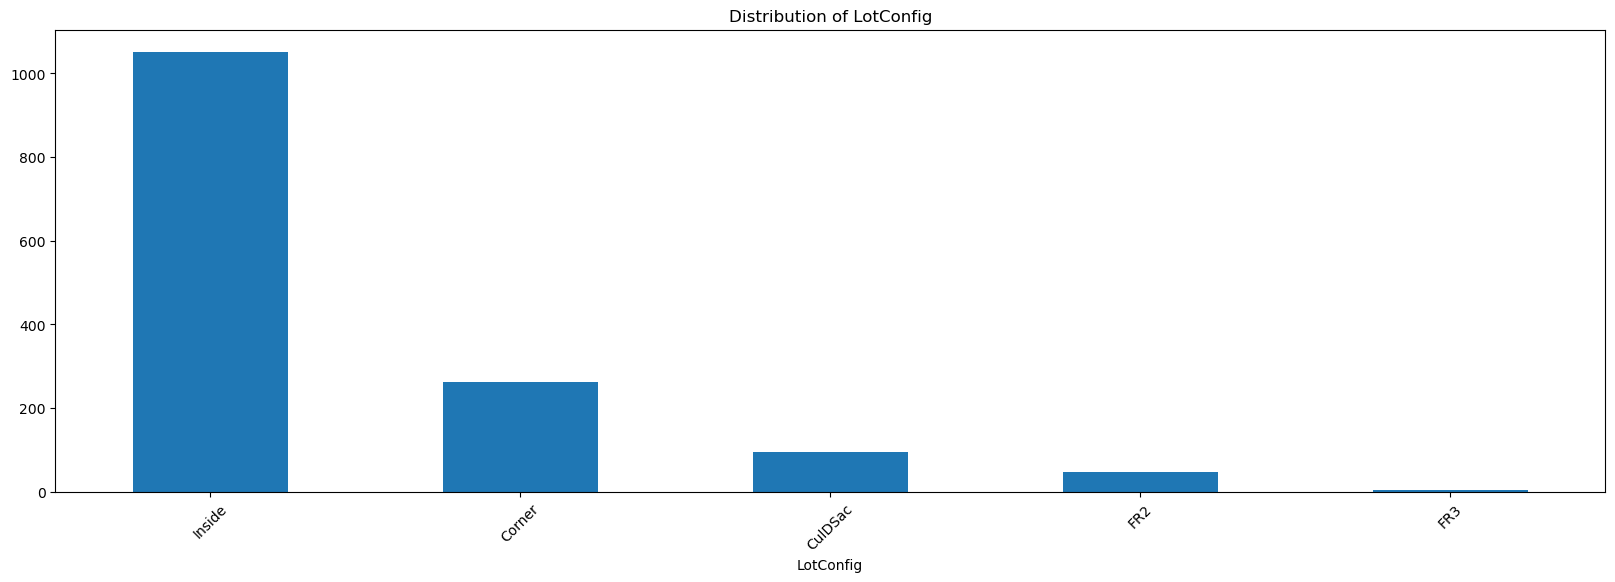

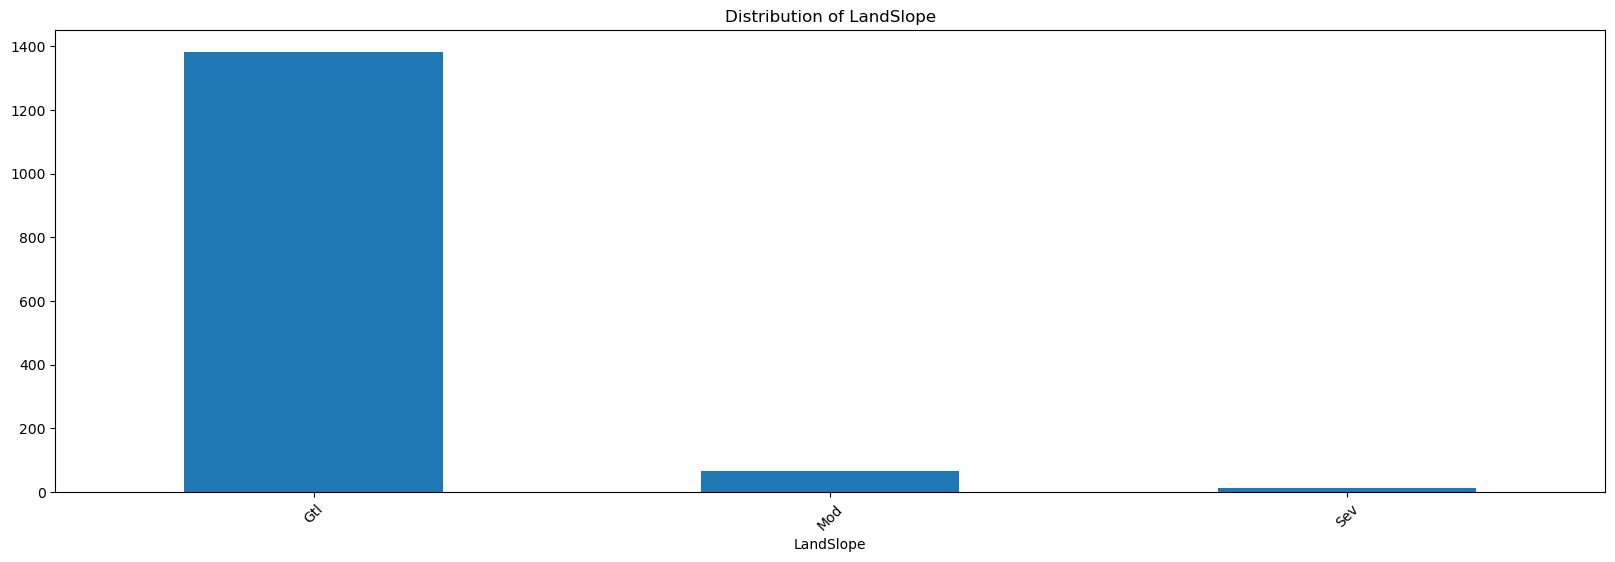

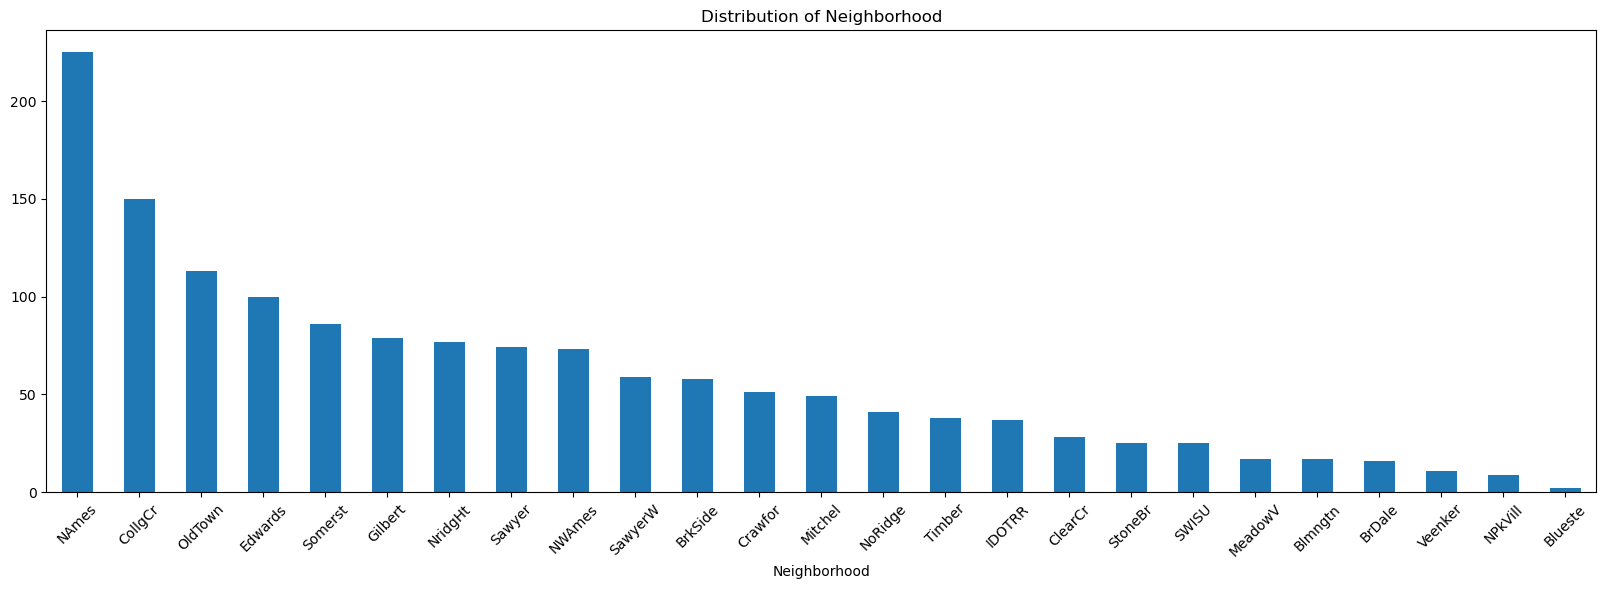

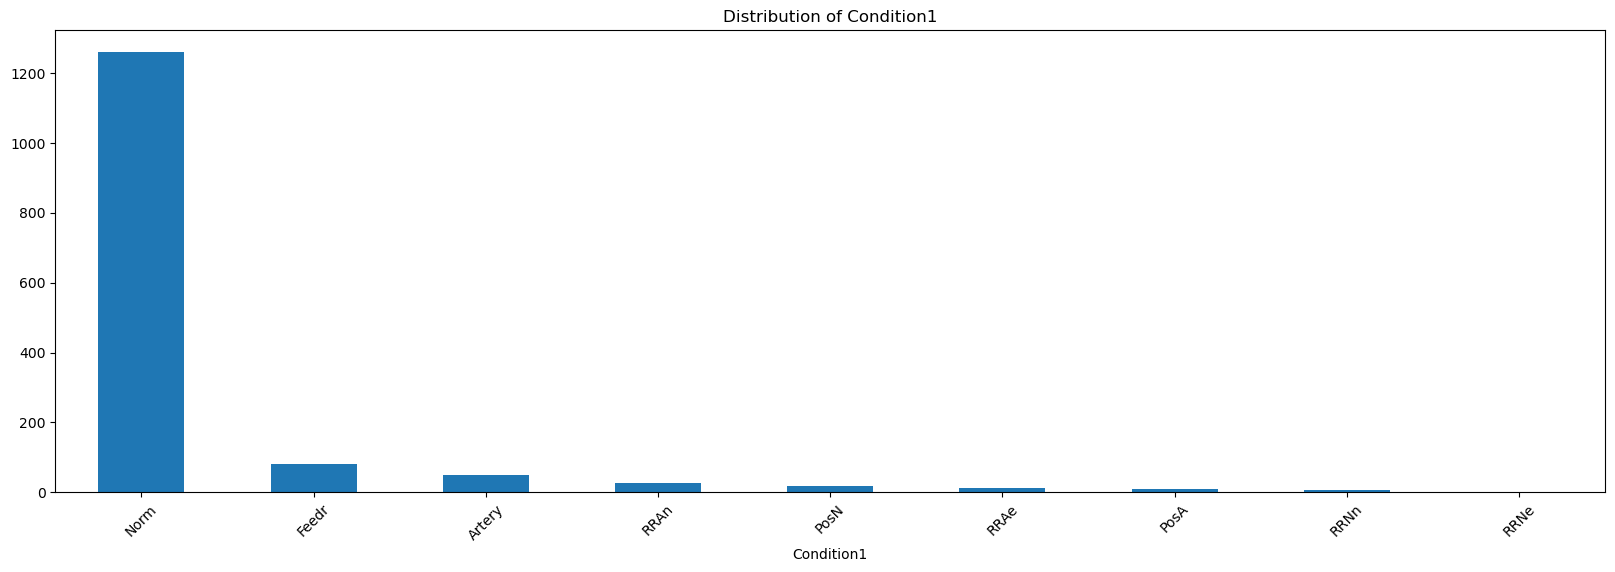

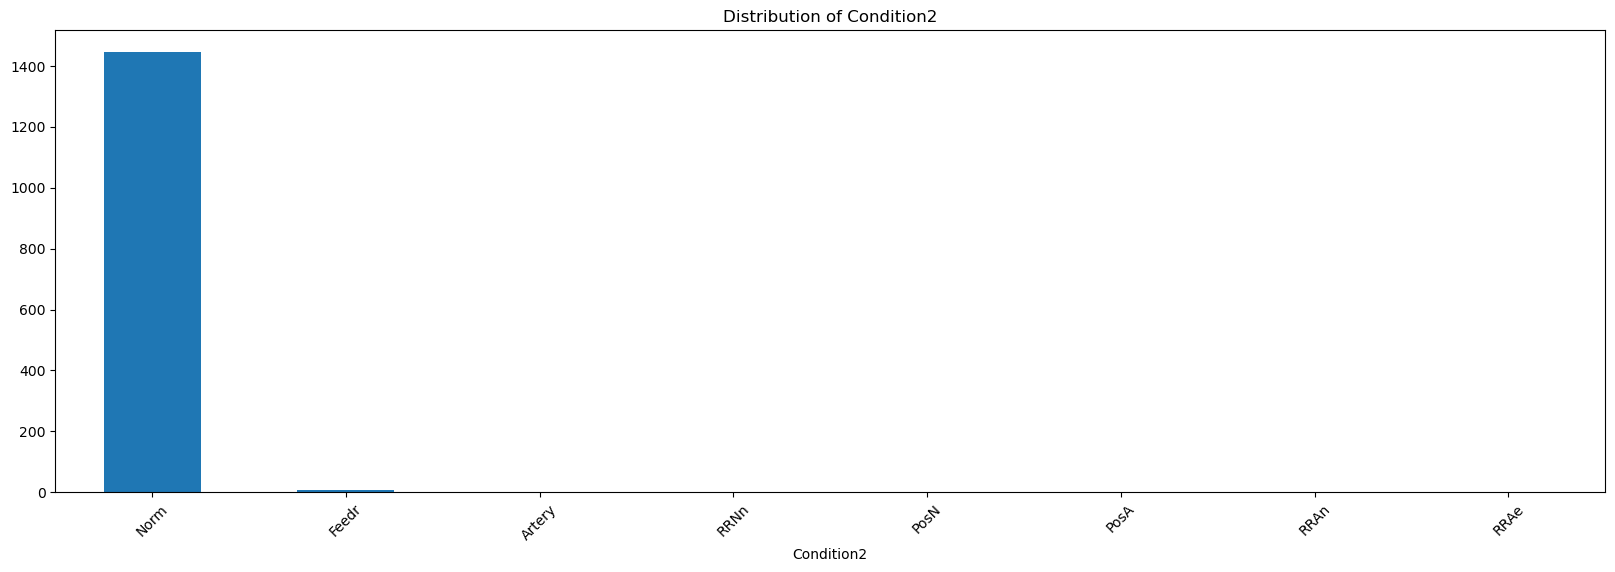

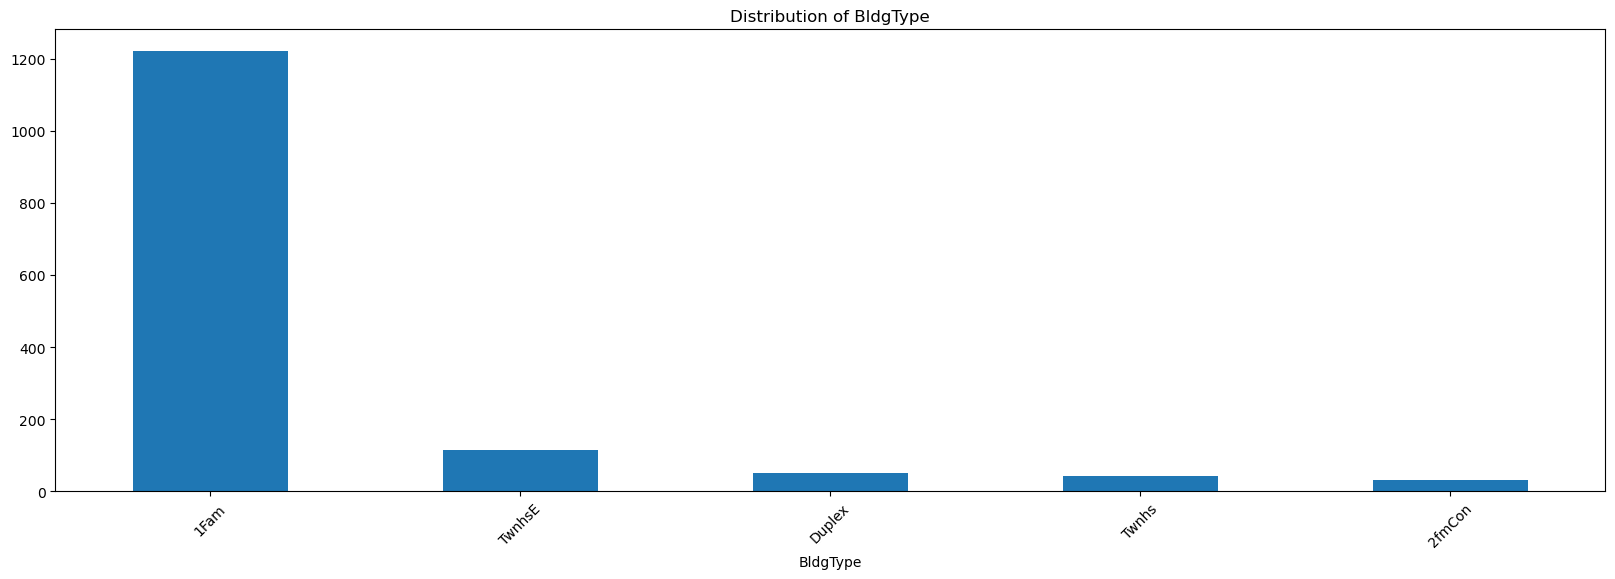

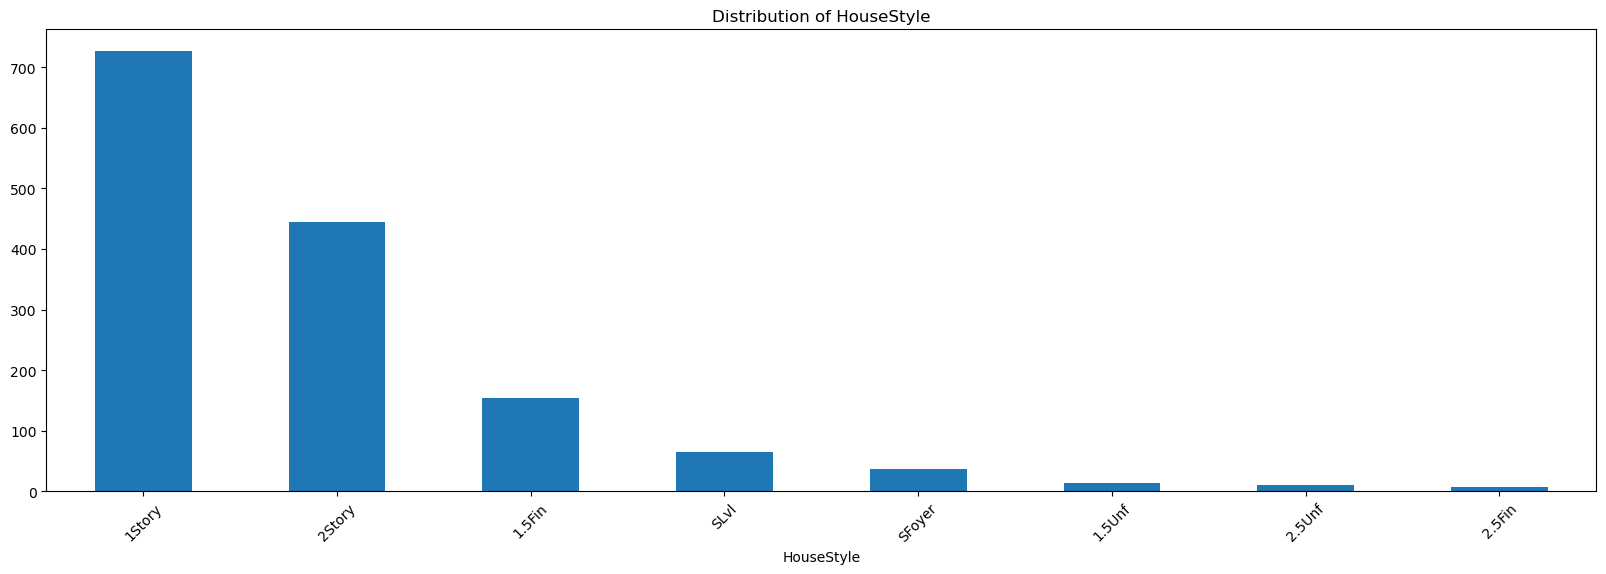

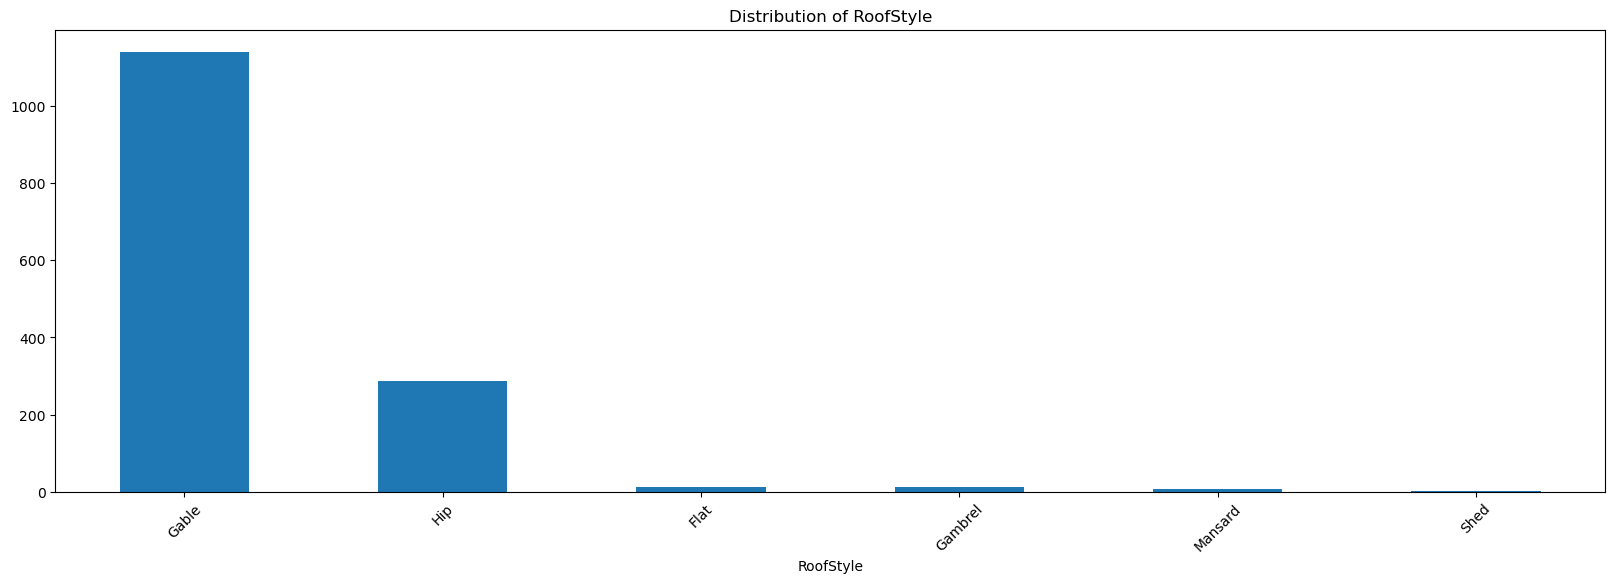

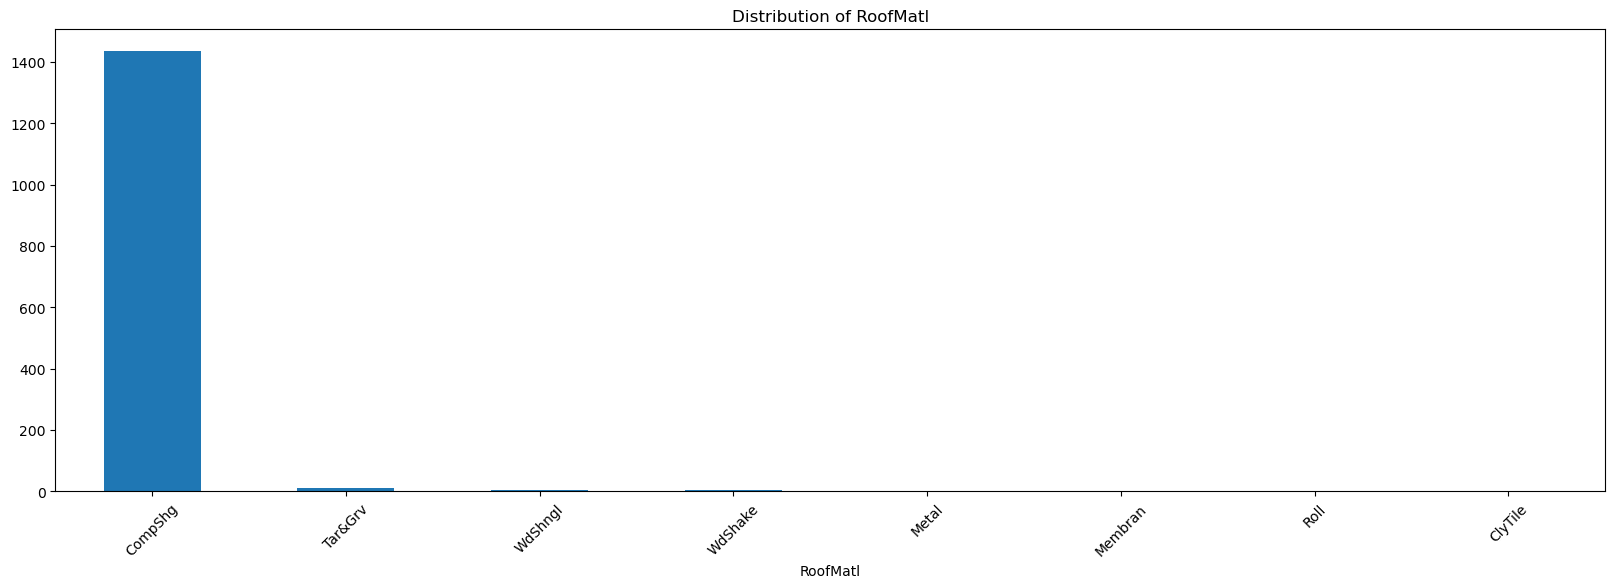

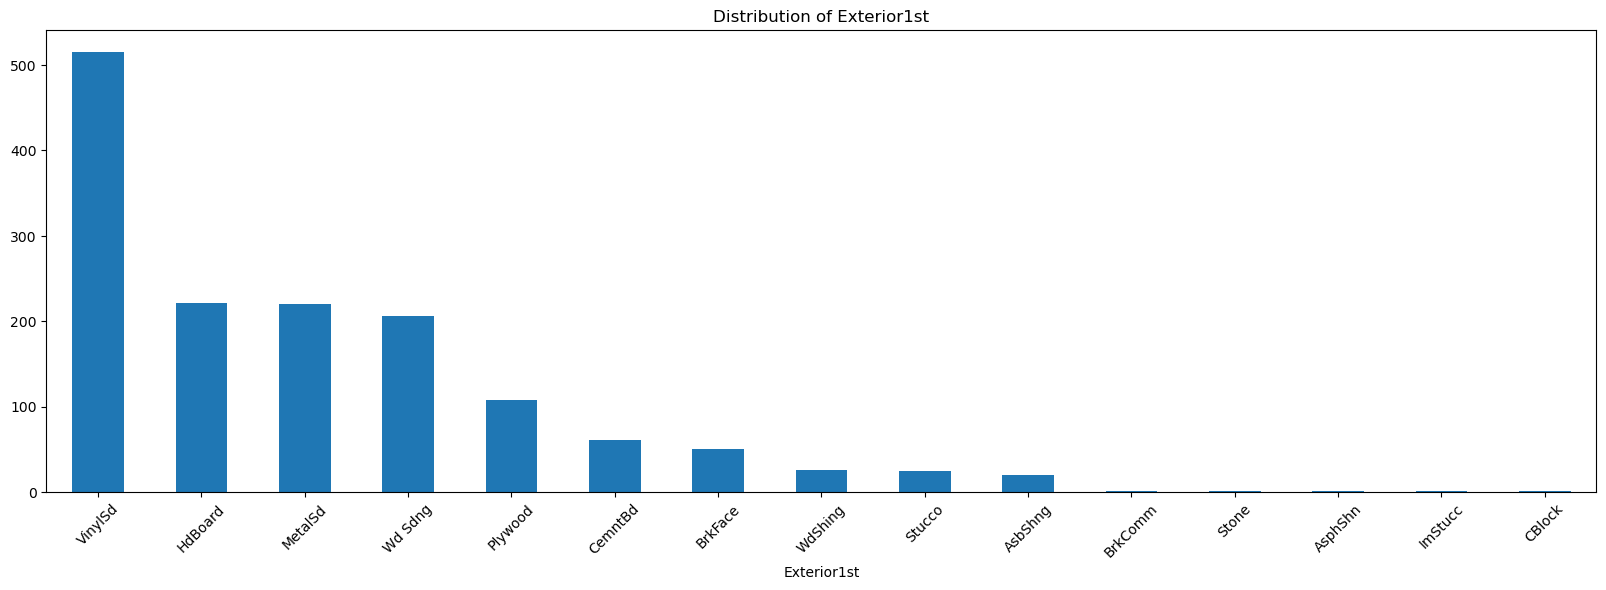

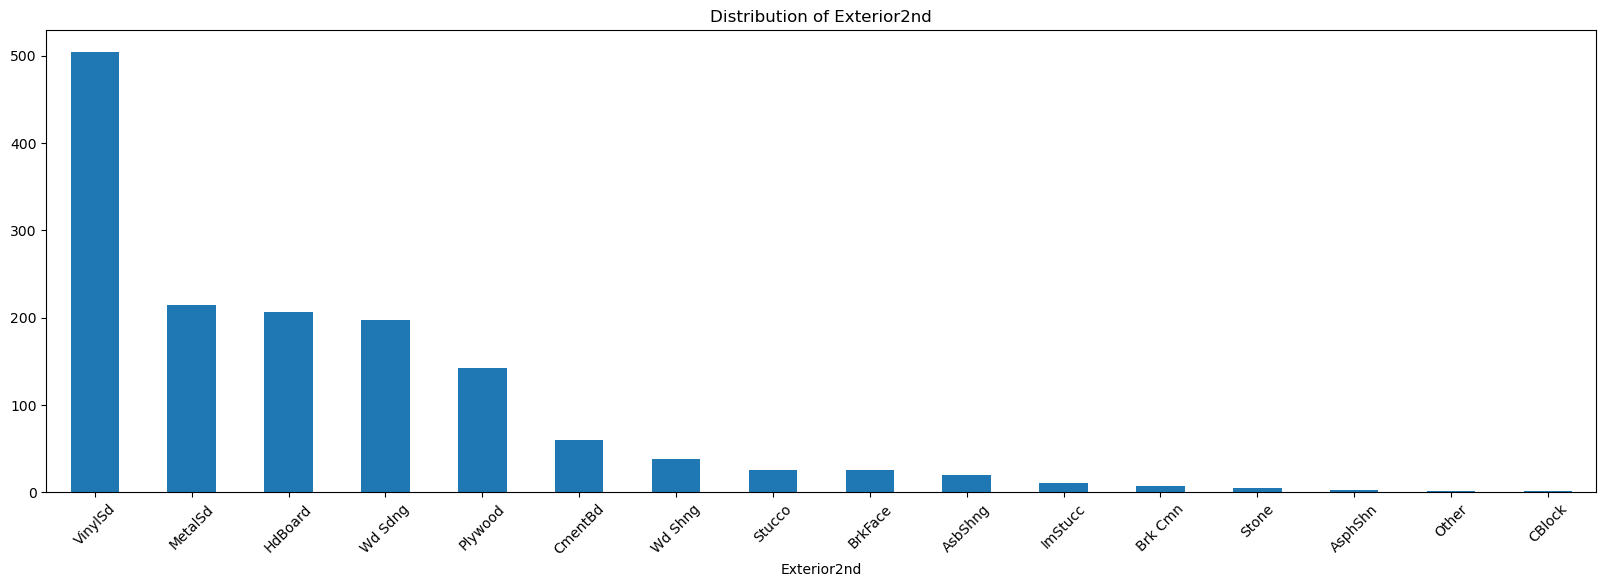

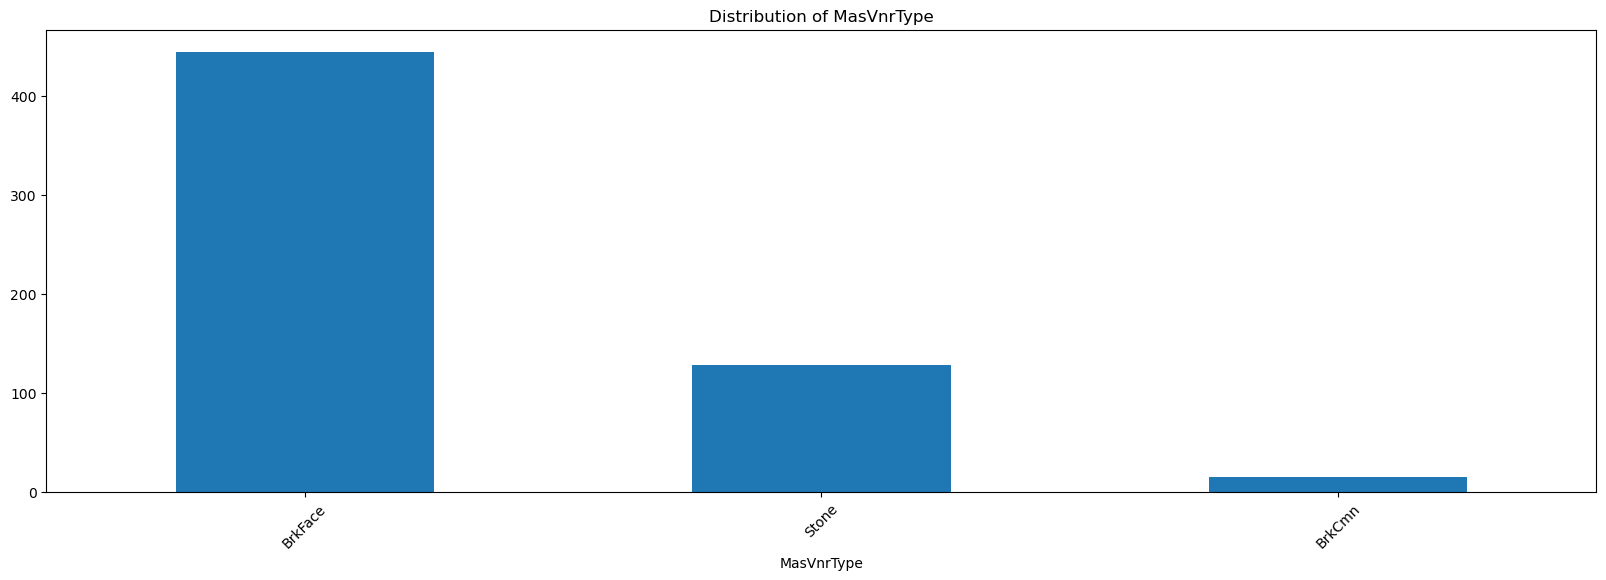

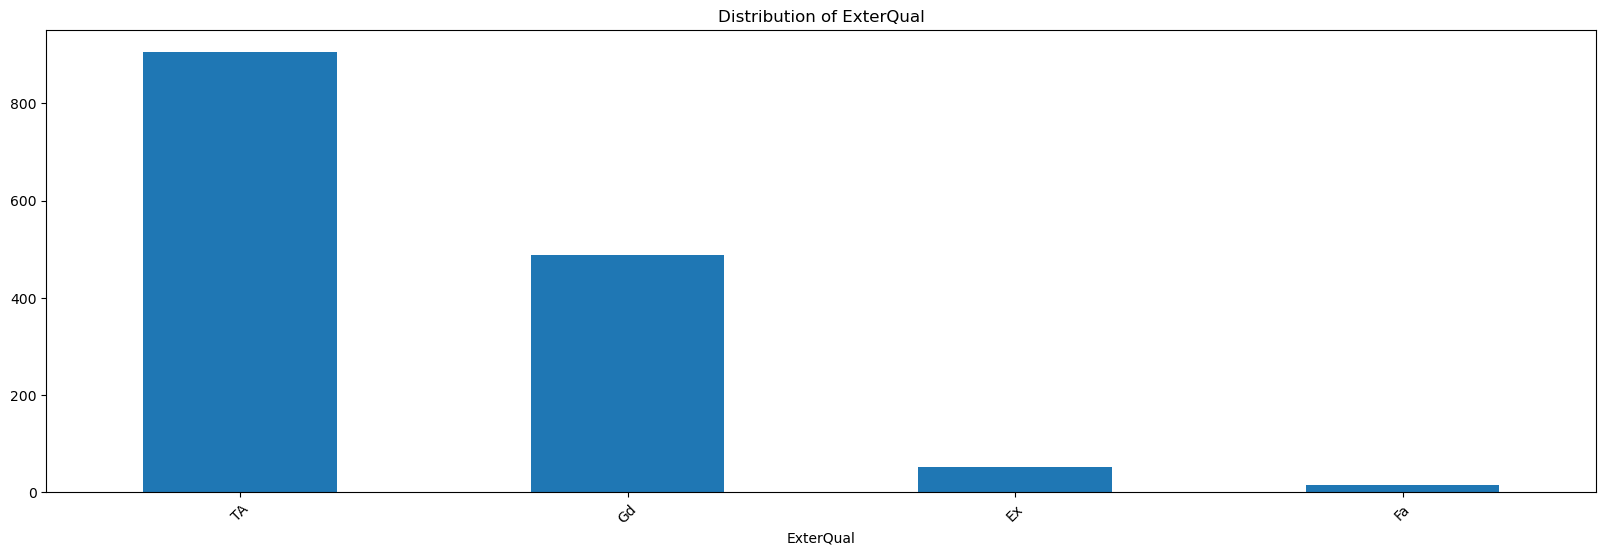

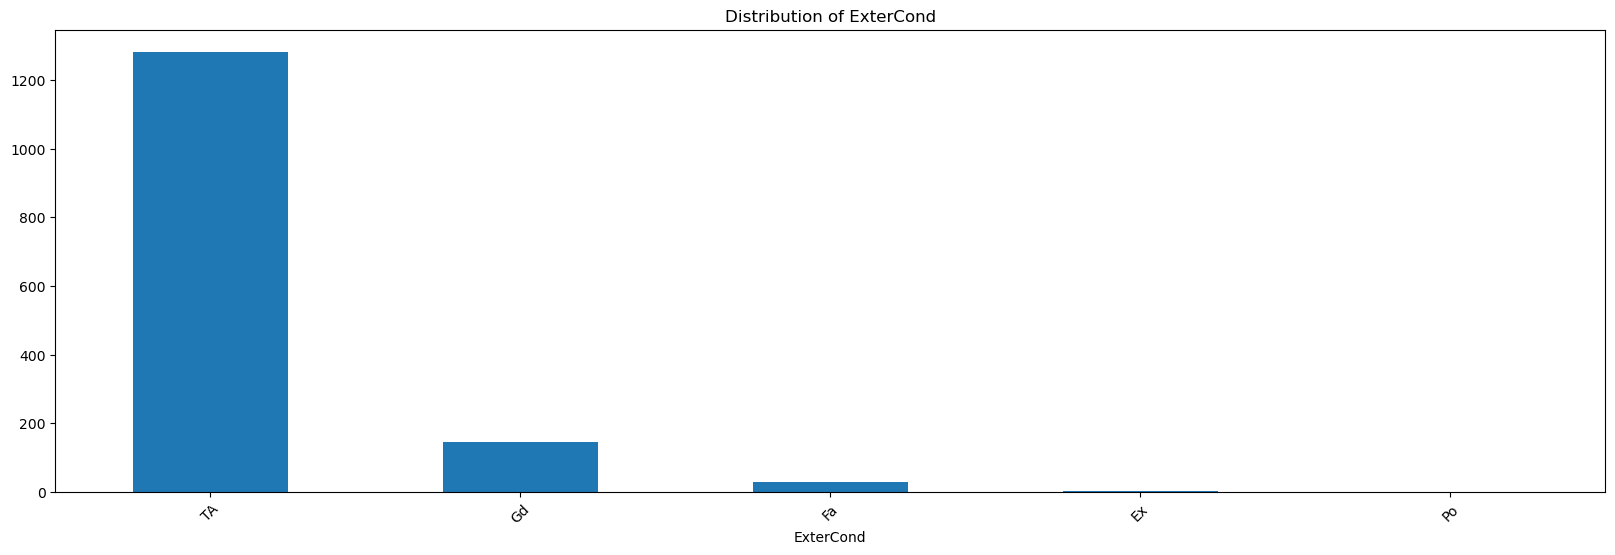

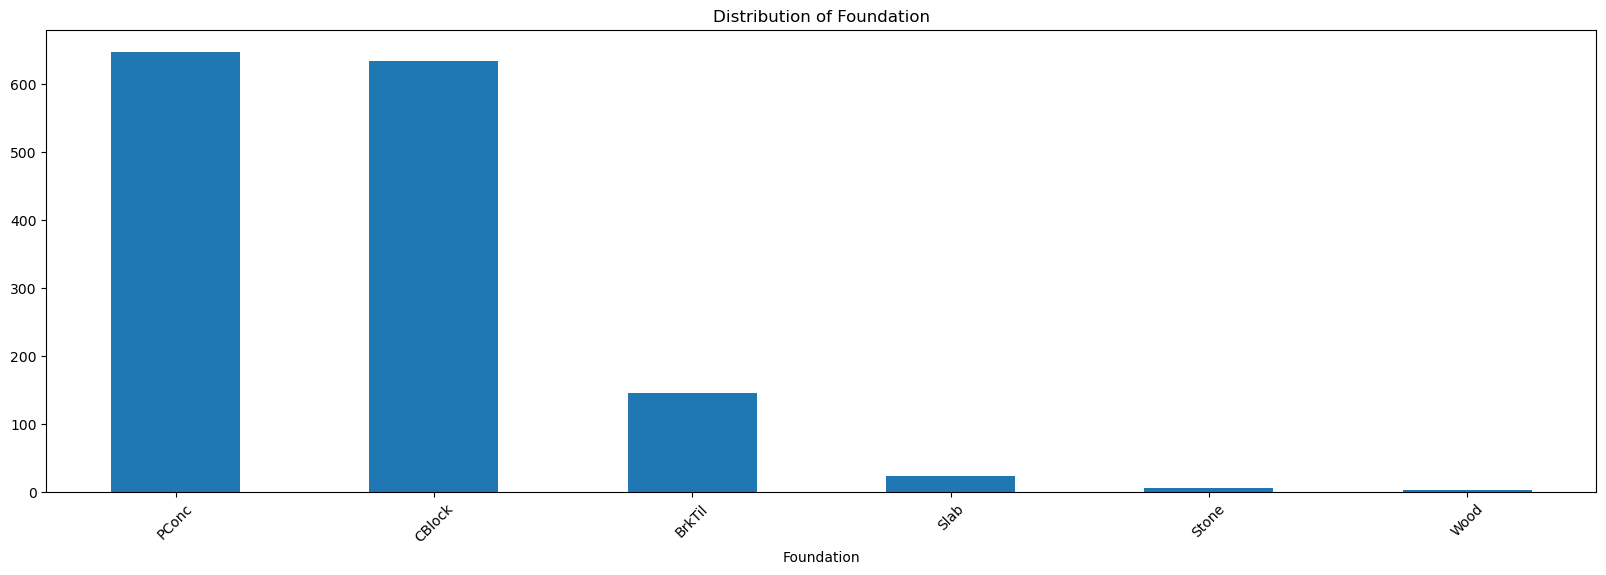

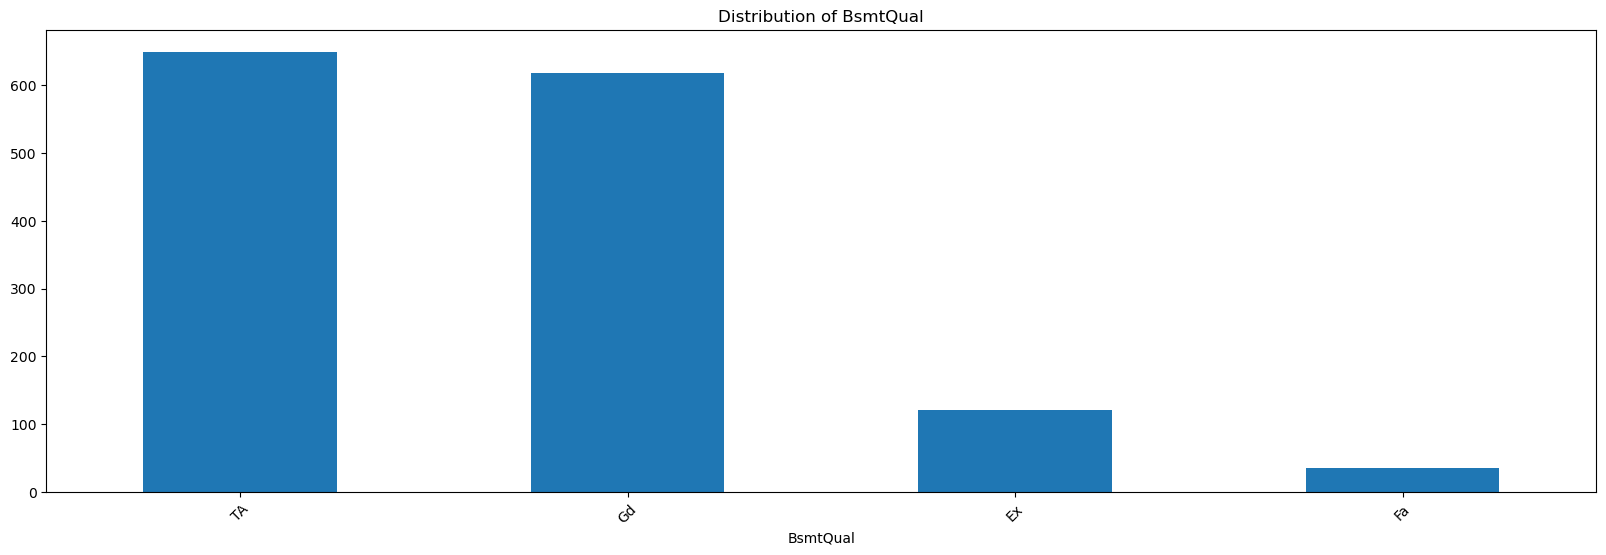

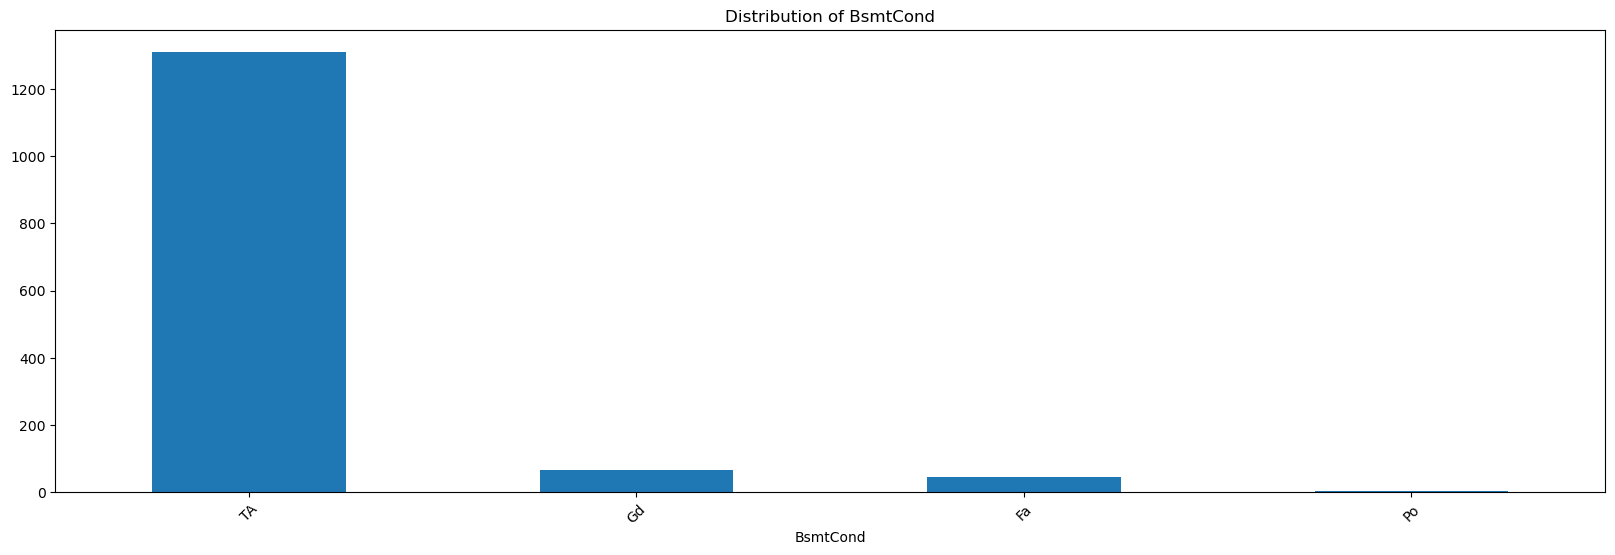

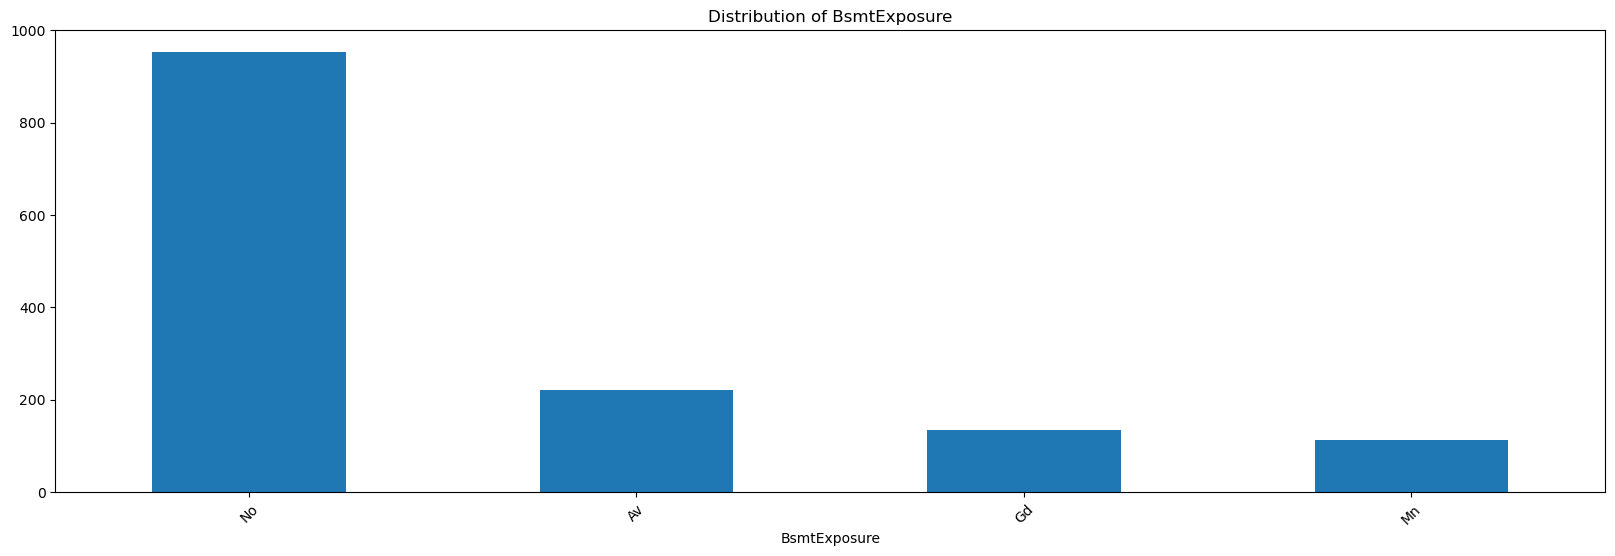

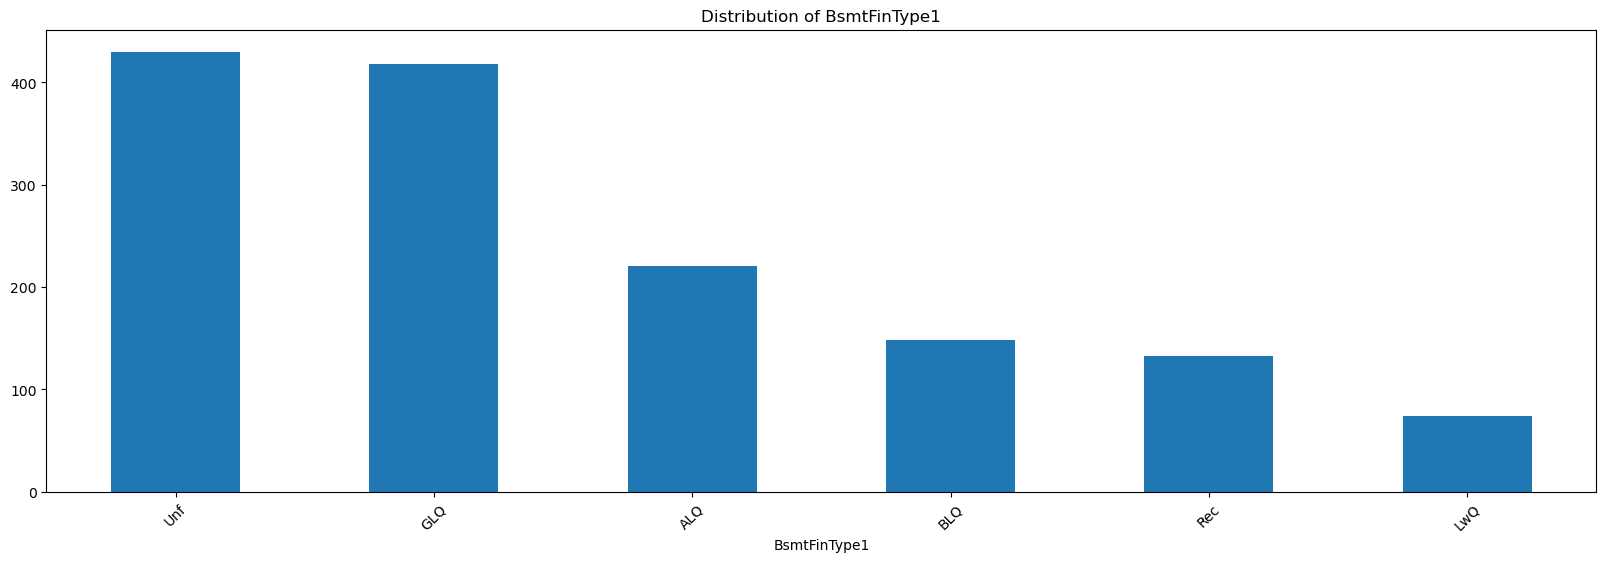

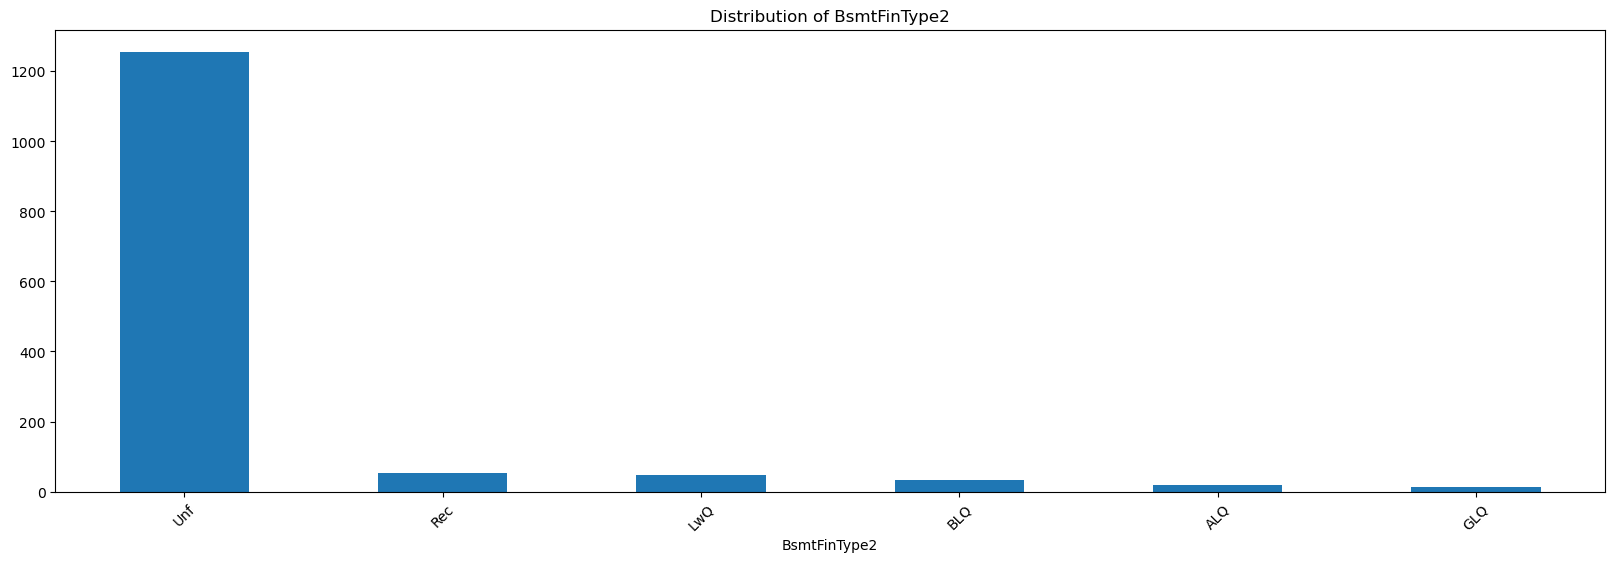

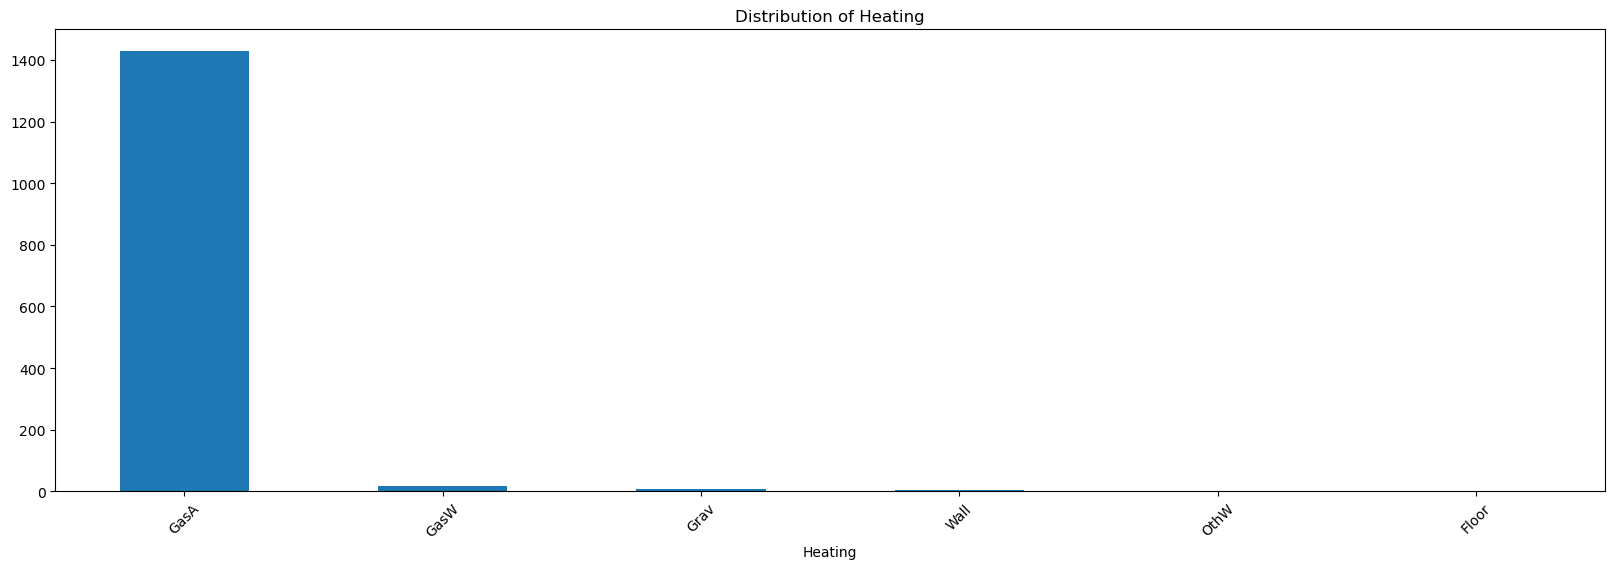

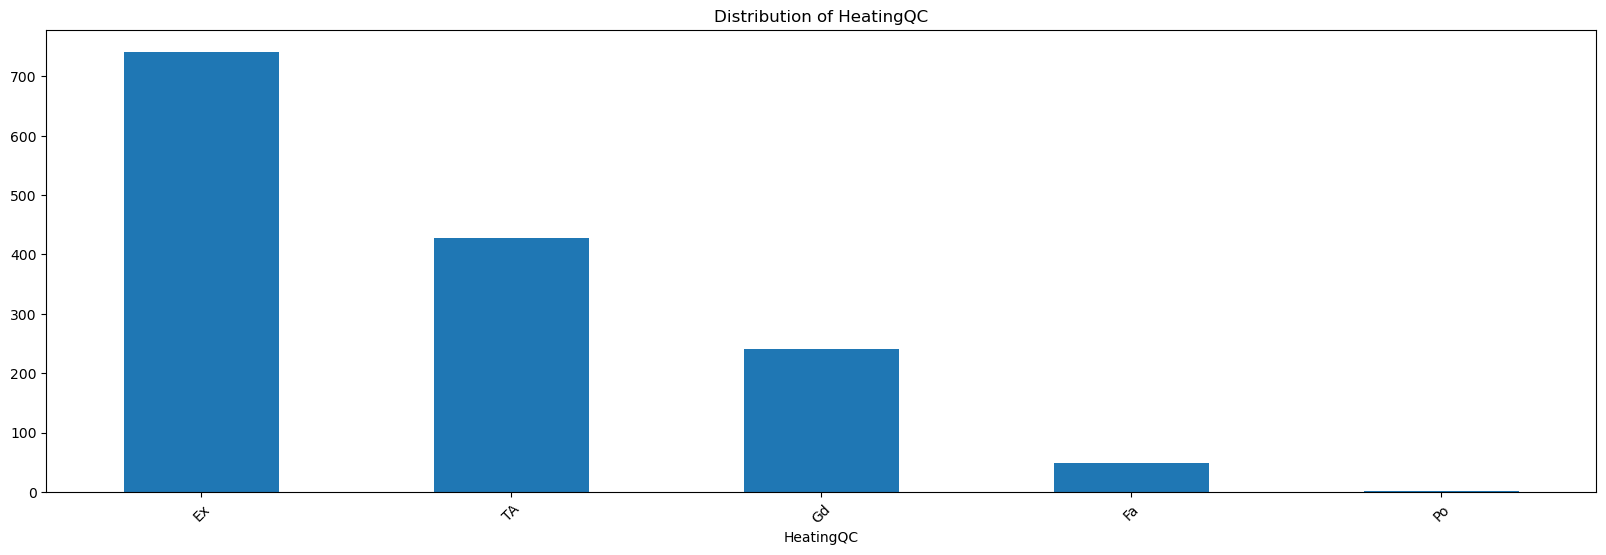

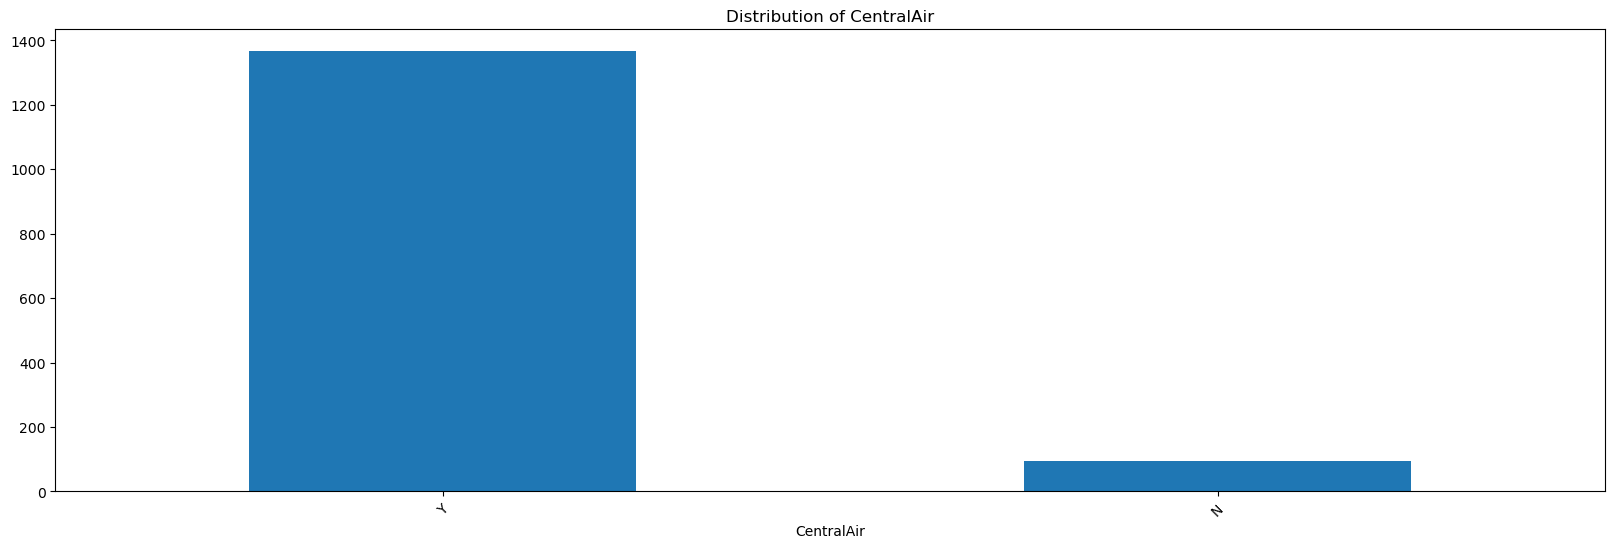

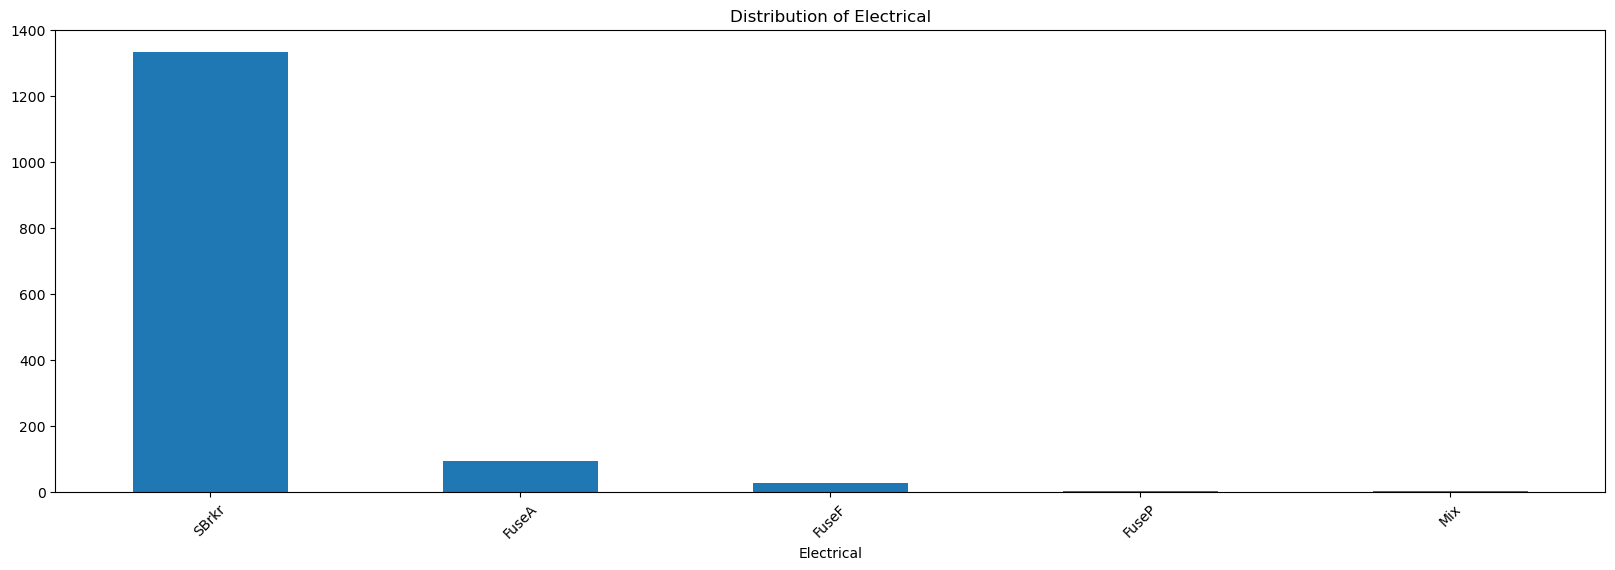

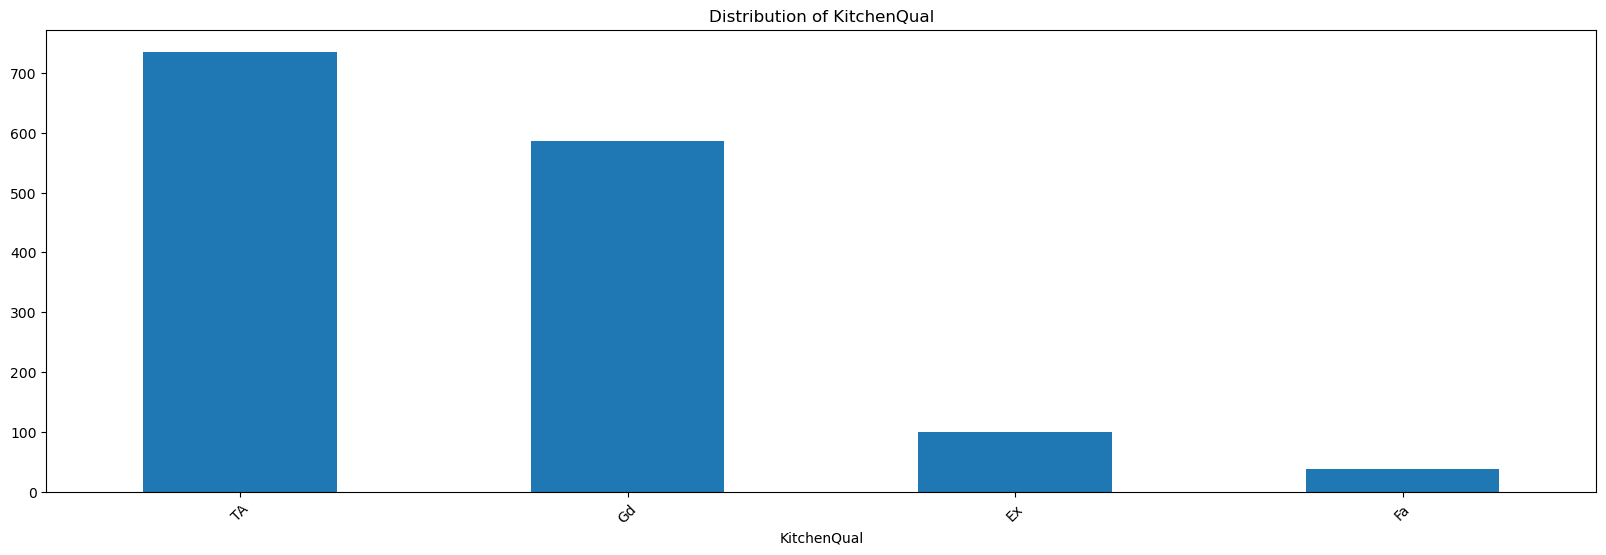

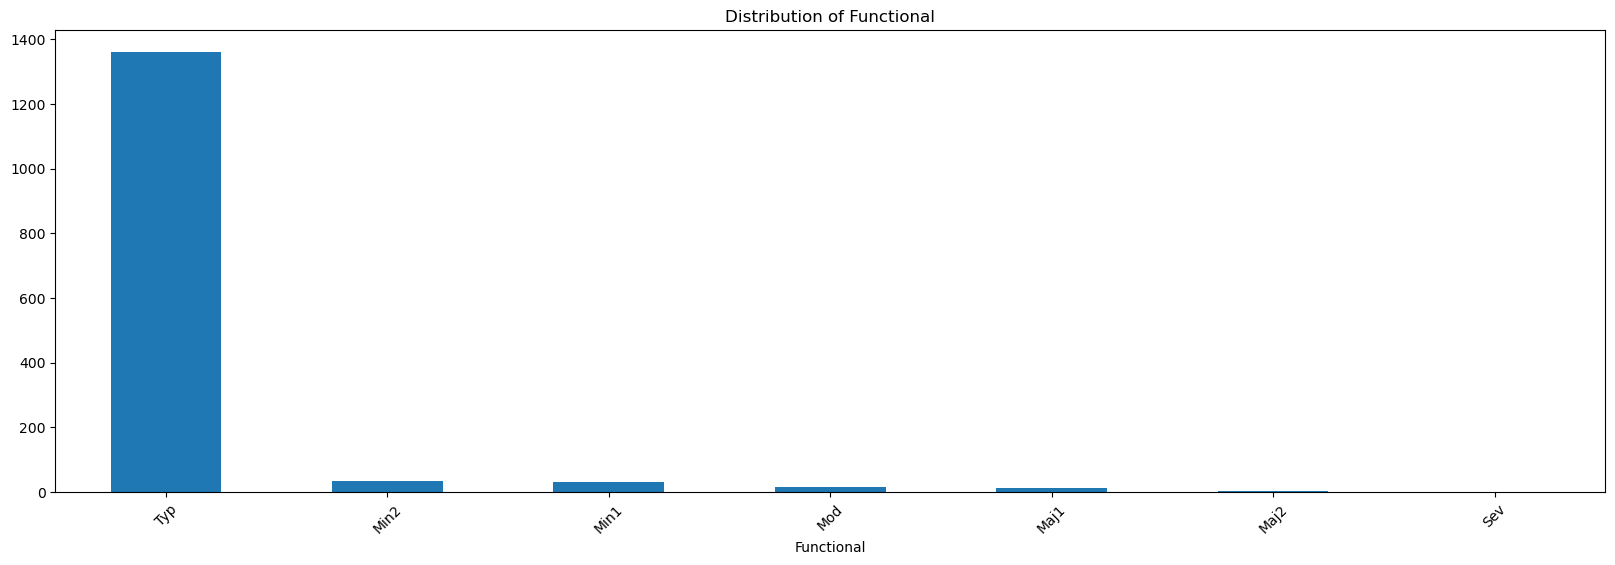

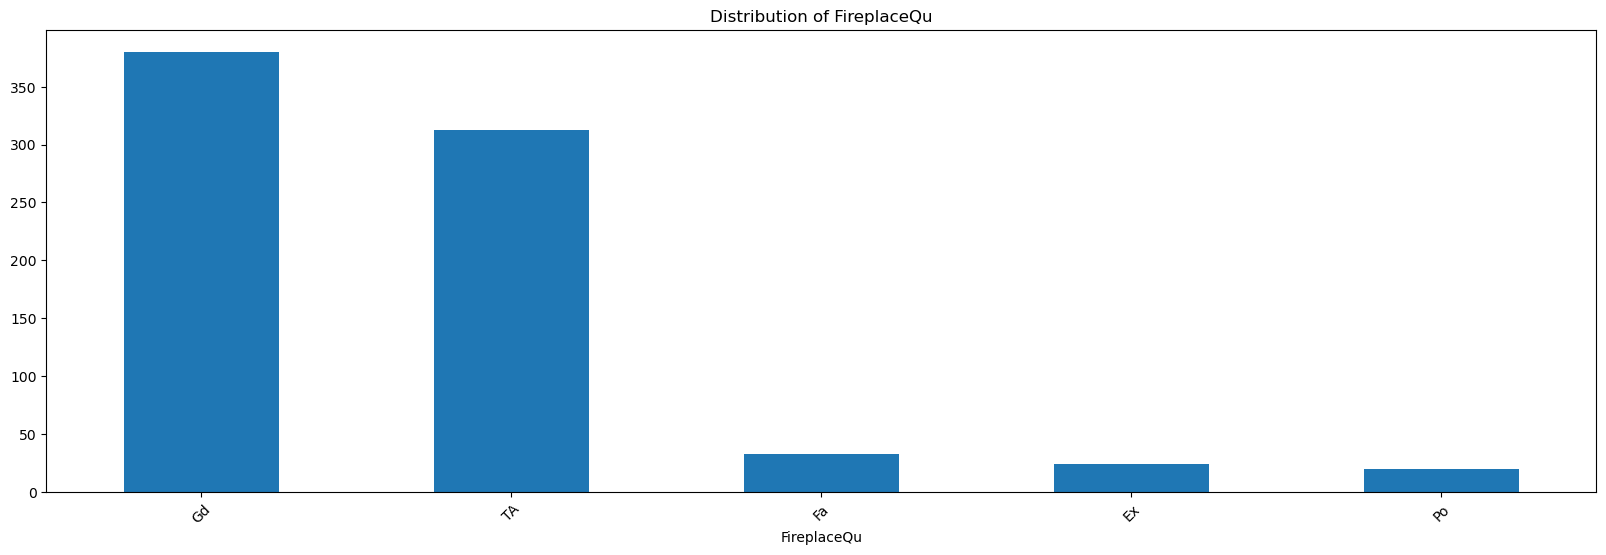

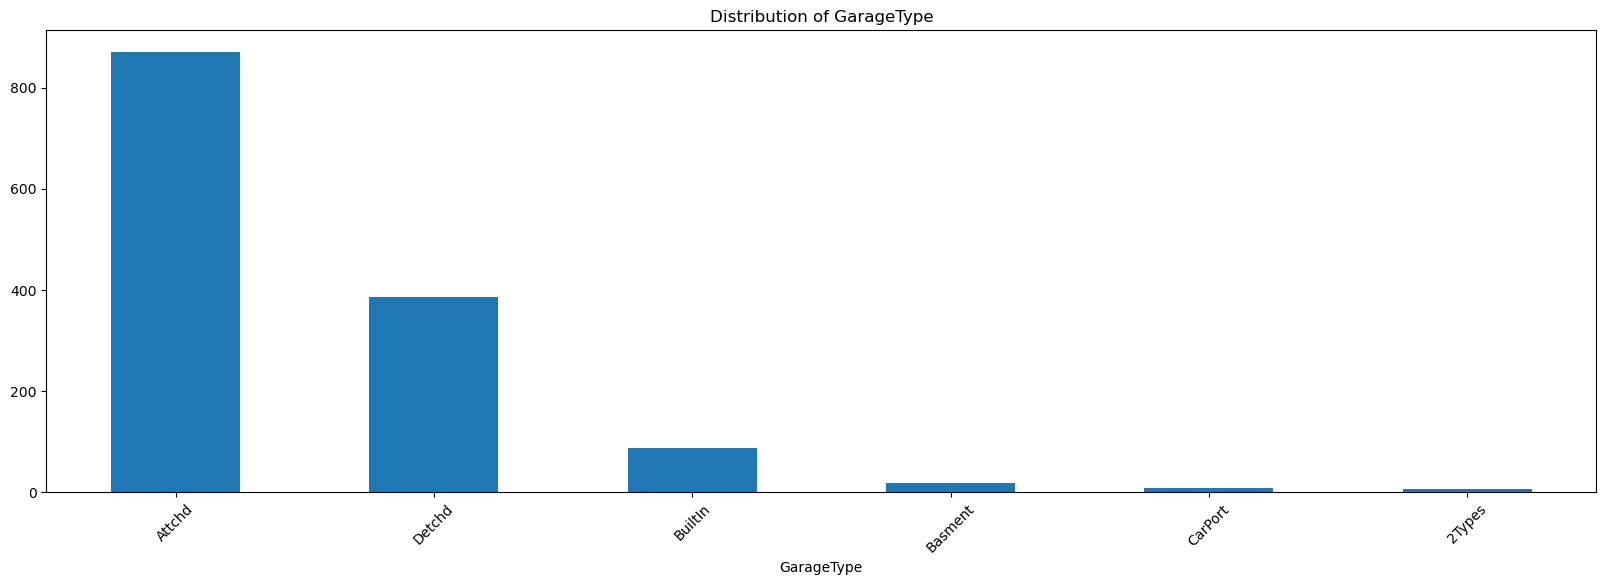

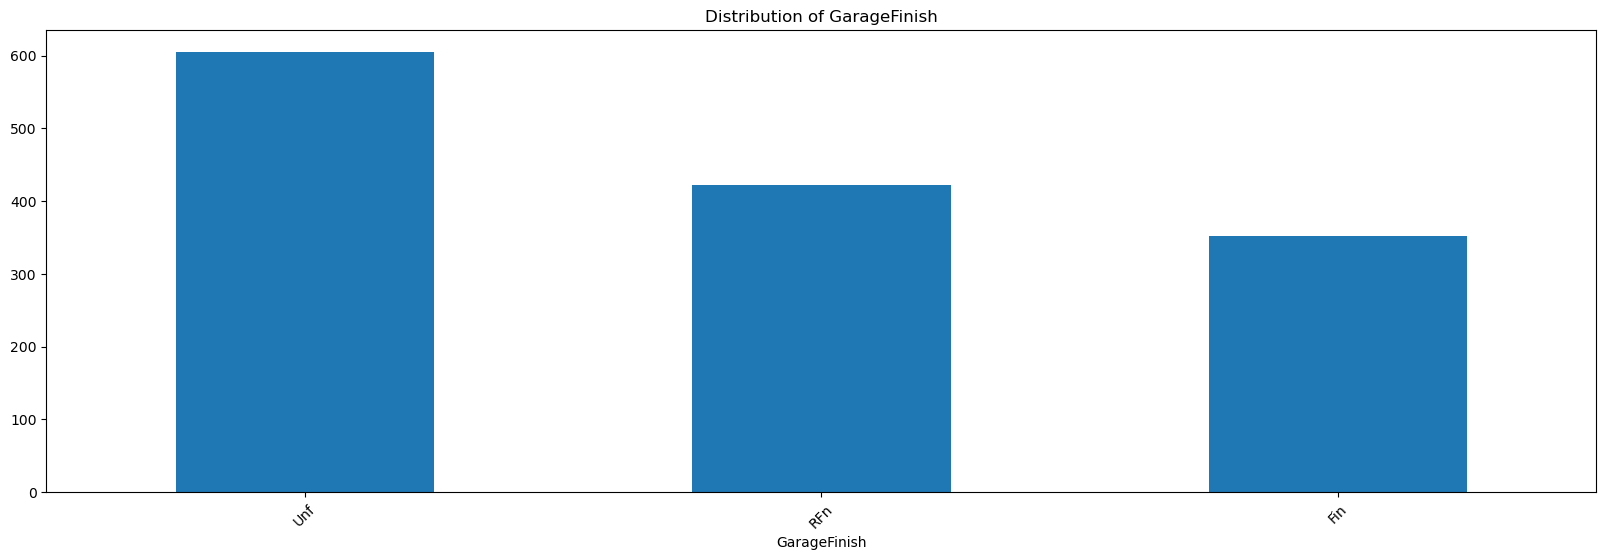

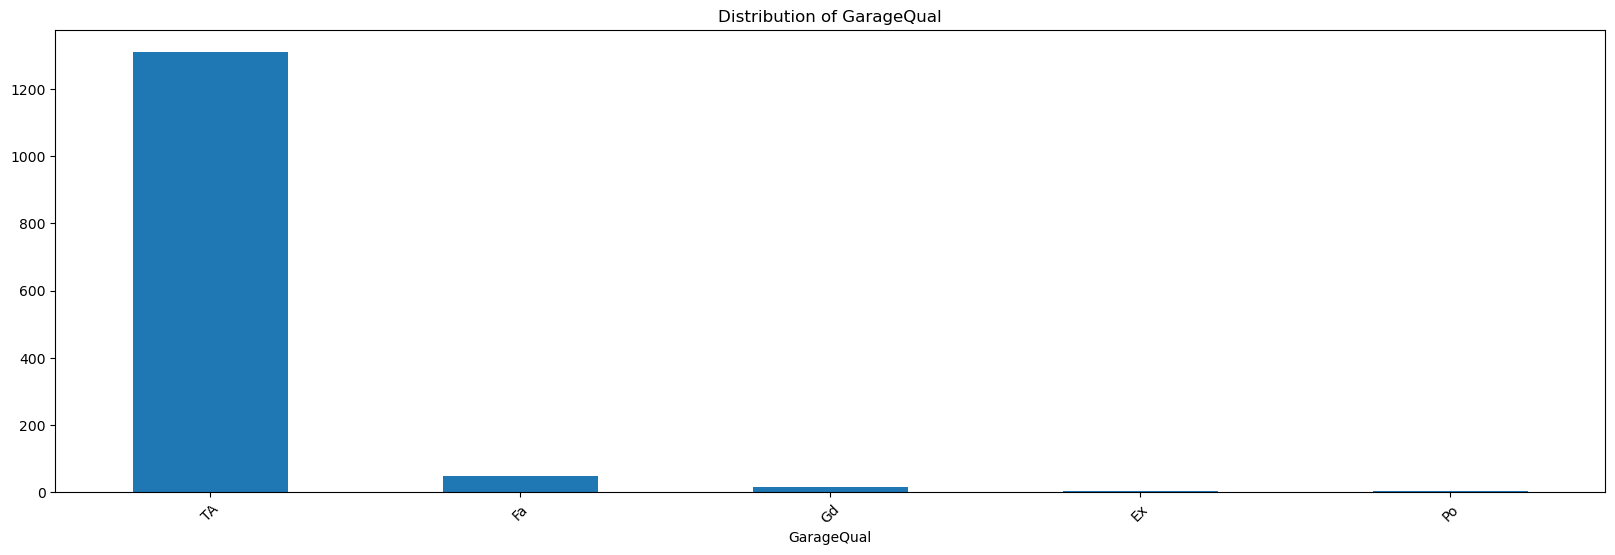

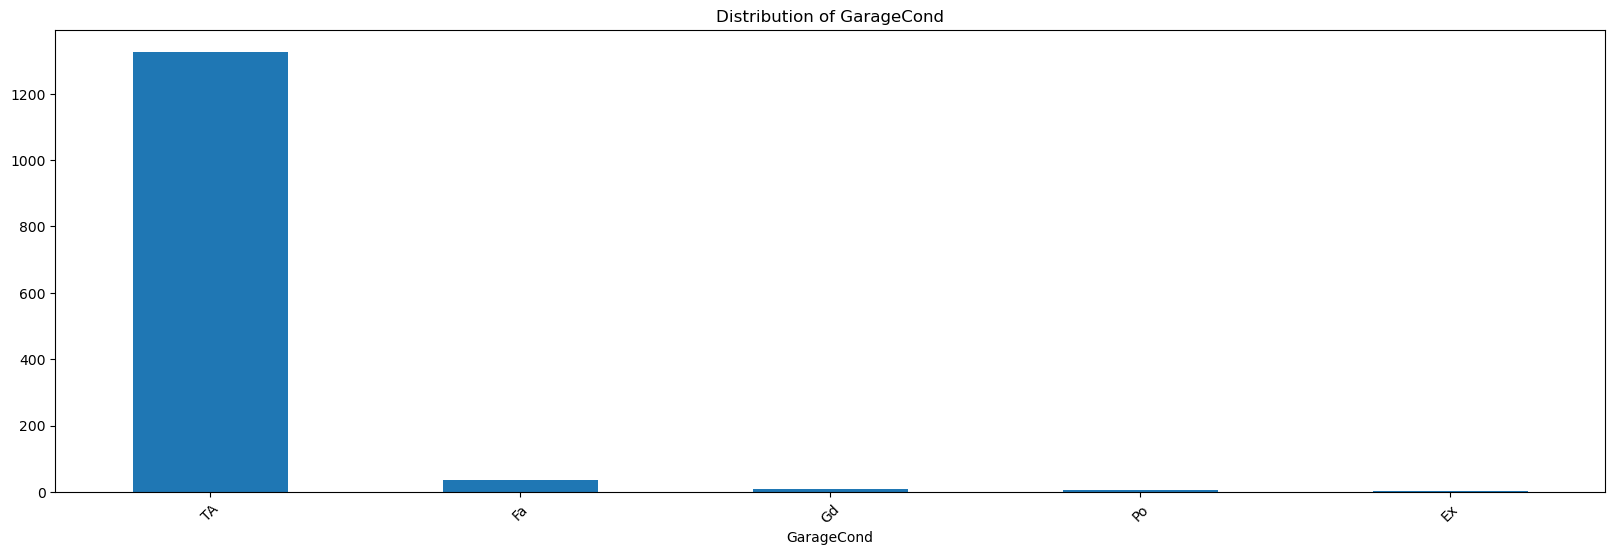

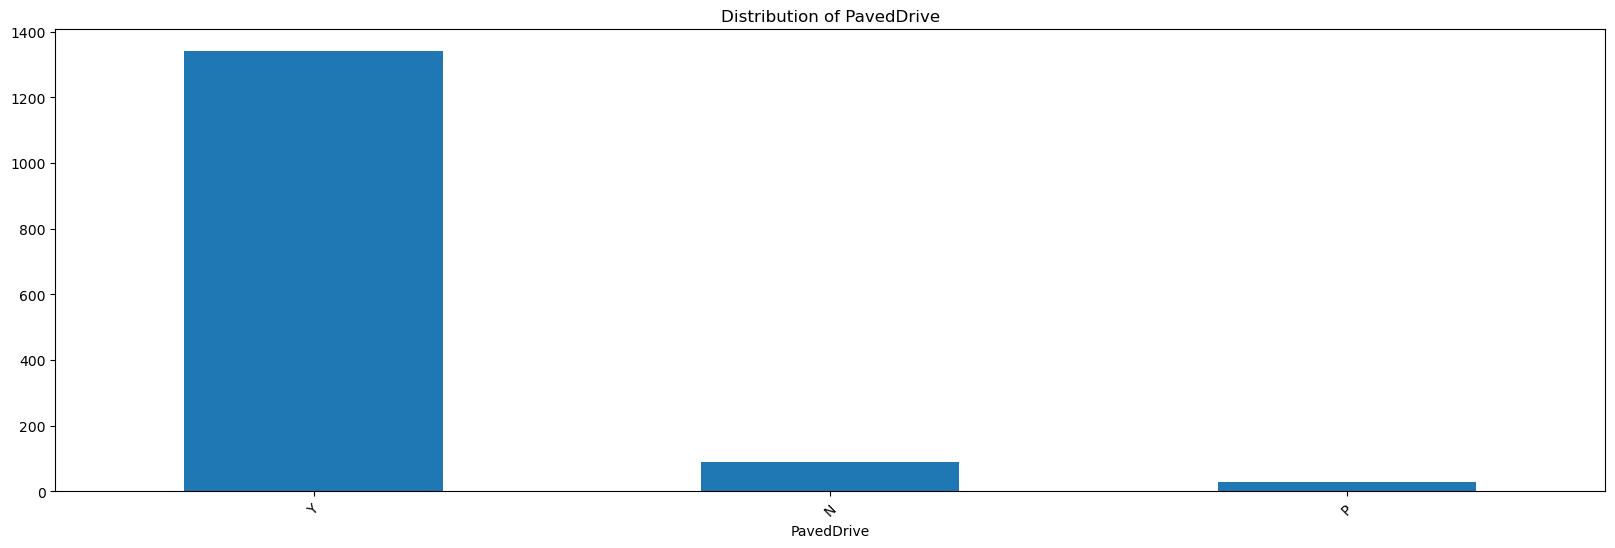

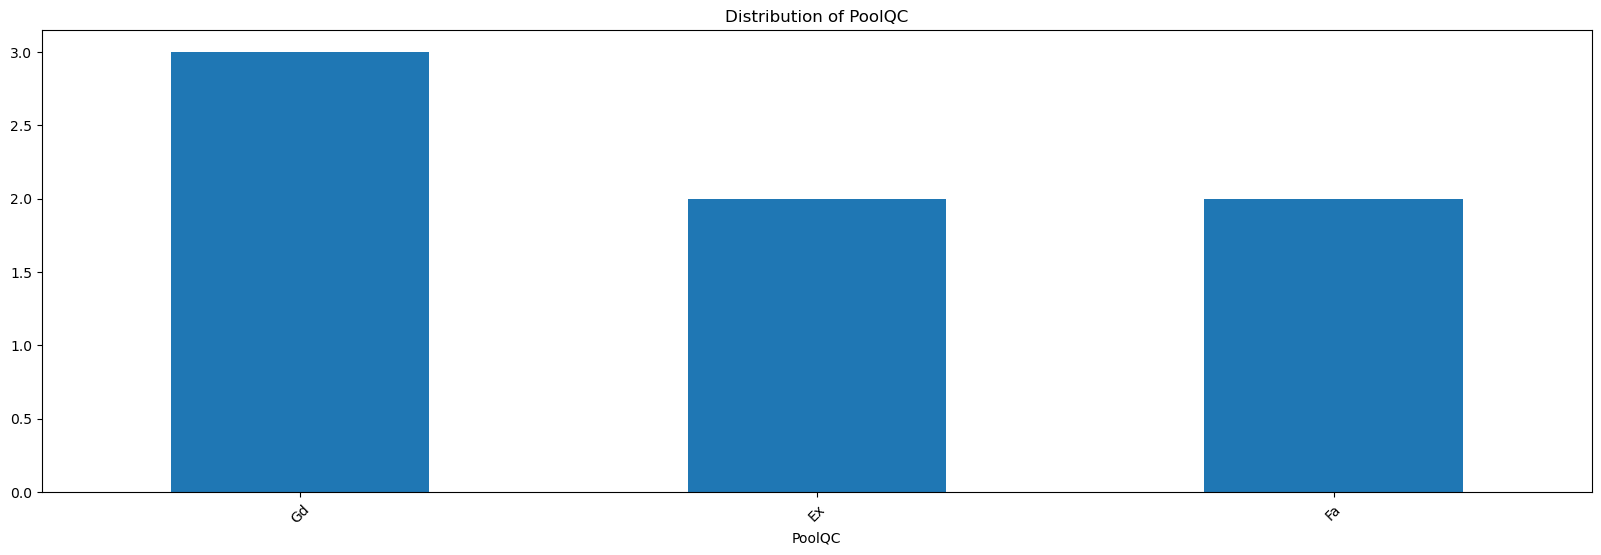

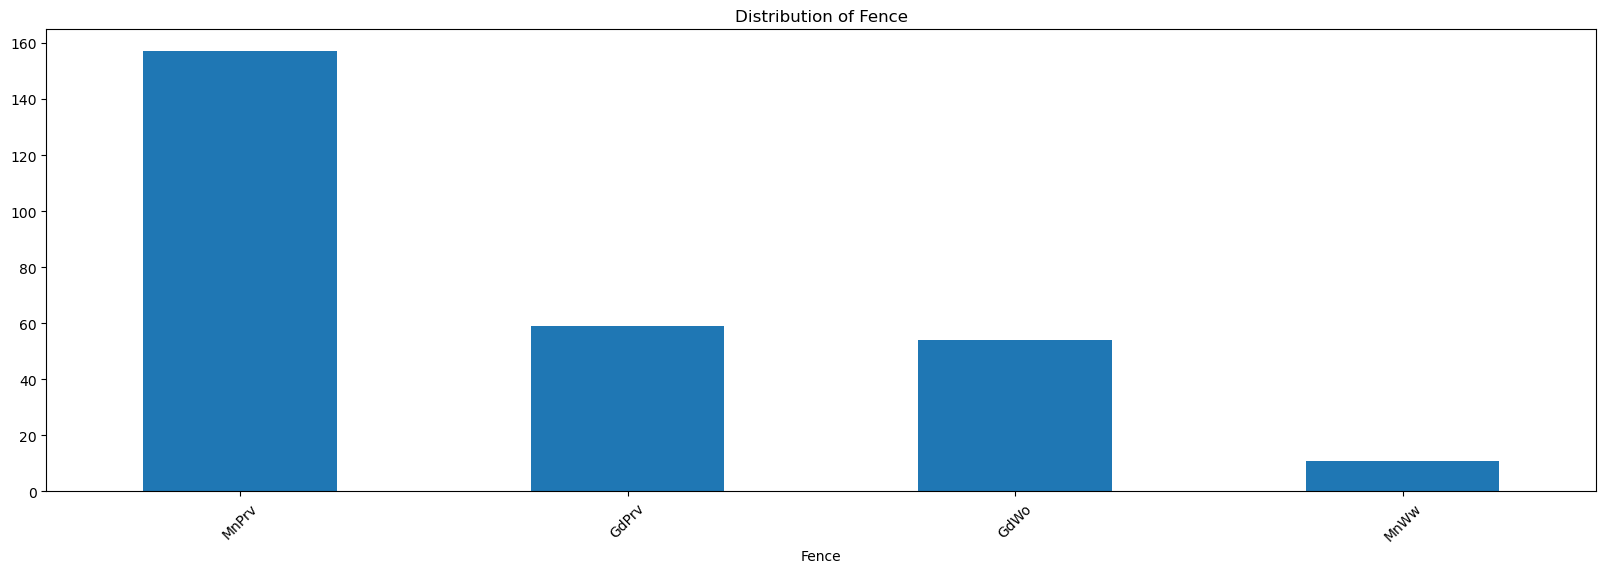

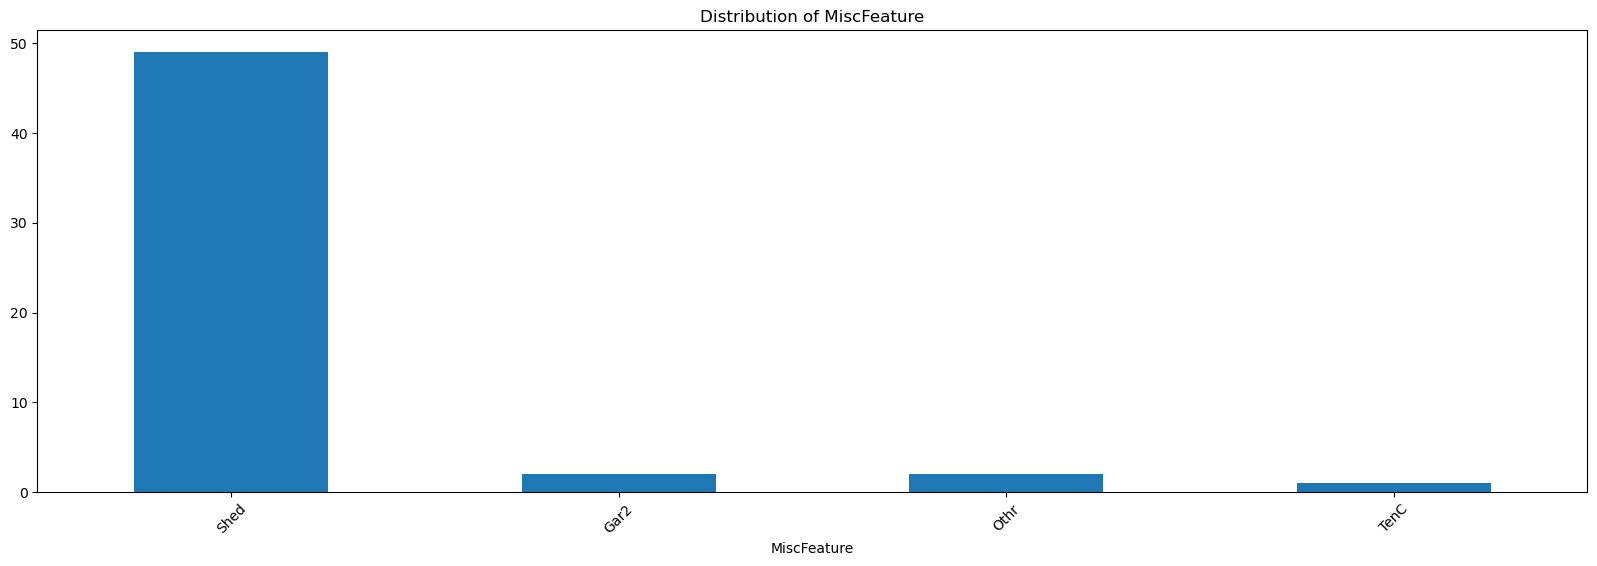

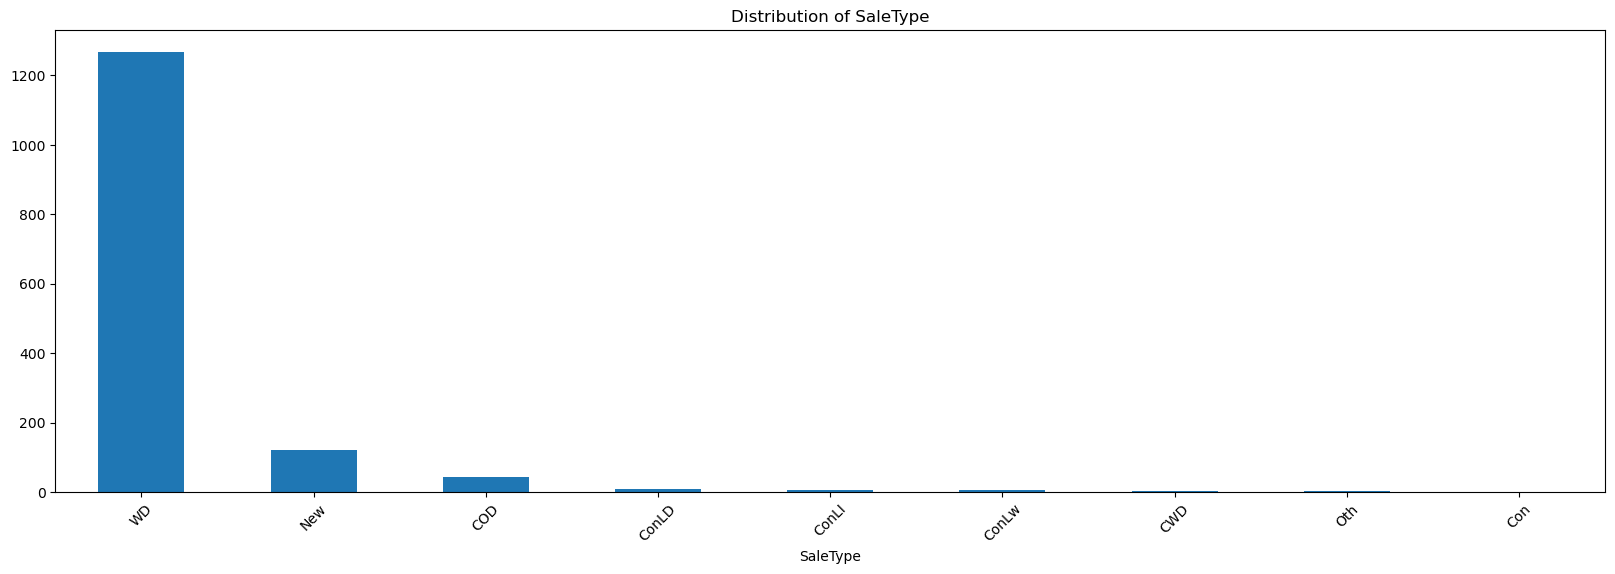

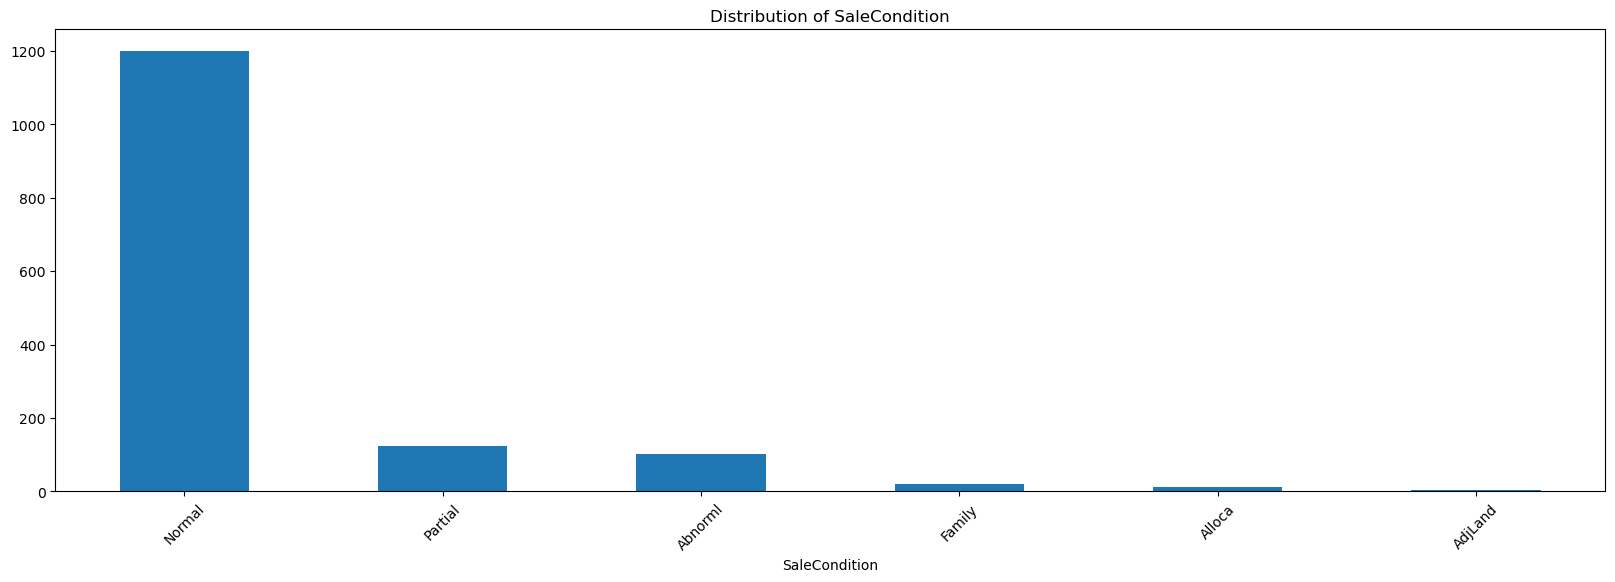

In [16]:
 #Categorical Data (if exists)
categorical_cols = clean_data_frame.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(20, 6))
    clean_data_frame[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()